In [ ]:
# Load required libraries (6 mins)
install.packages("quantmod")
install.packages("moments")
install.packages("zoo")
install.packages("tseries")
install.packages("reshape2")
# install.packages("forecast")
install.packages("rugarch")
# install.packages("PerformanceAnalytics")
# install.packages("fitdistrplus")
install.packages("car", dependencies=TRUE)
library(car)

# library(PerformanceAnalytics)
# library(fitdistrplus)
library(quantmod)
library(rugarch)
library(moments)
library(zoo)
library(tseries)
library(reshape2)
# library(forecast)
library(xts)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘fracdiff’, ‘nloptr’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the depe

In [ ]:
install.packages("car", dependencies=TRUE)
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 1

In [ ]:
# S&P 500 data

start_date <- as.Date("1995-02-13")
end_date <- Sys.Date()
sp500_data <- getSymbols("^GSPC", src = "yahoo", from = start_date, to = end_date, auto.assign = FALSE)
log_returns     <- dailyReturn(Cl(sp500_data), type = "log")
log_returns     <- na.omit(log_returns)

# Compute descriptive statistics
mean_return <- mean(log_returns, na.rm = TRUE)
var_return <- var(log_returns, na.rm = TRUE)
skewness_return <- skewness(log_returns, na.rm = TRUE)
kurtosis_return <- kurtosis(log_returns, na.rm = TRUE)

cat('mean', mean_return)
cat('\nvar', var_return)
cat('\nskewness', skewness_return)
cat('\nkurtosis', kurtosis_return)

mean 0.0003365061
var 0.0001416736
skewness -0.4067337
kurtosis 13.17616

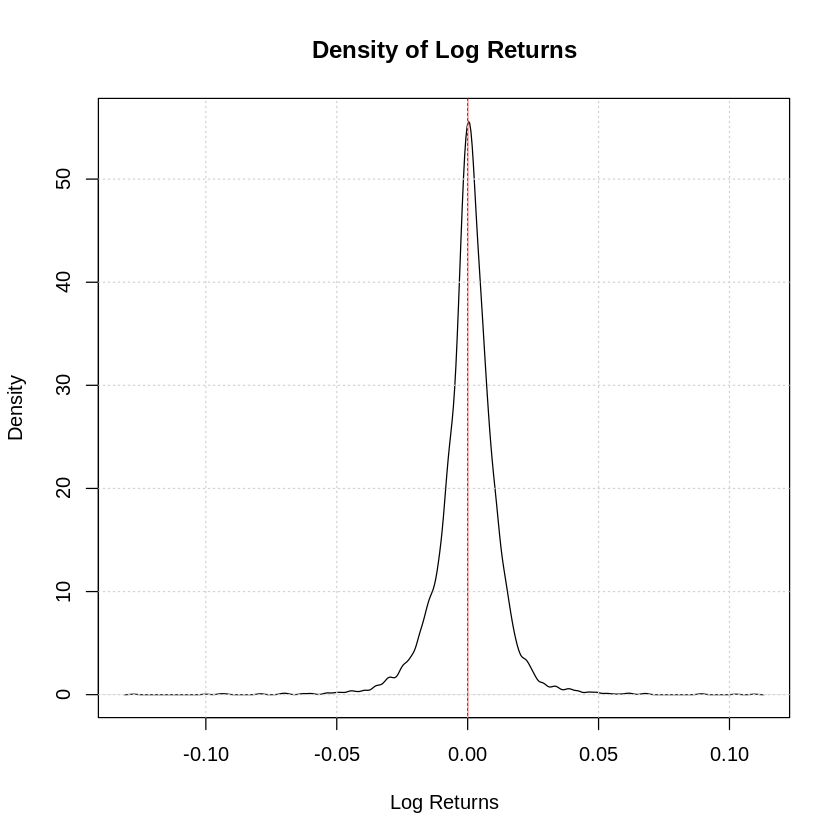

In [ ]:
plot(density(log_returns), main = "Density of Log Returns", xlab = "Log Returns")
abline(v = 0, col = "red") # Add a vertical line at 0
grid()


#### rolling means

pdf 
  2

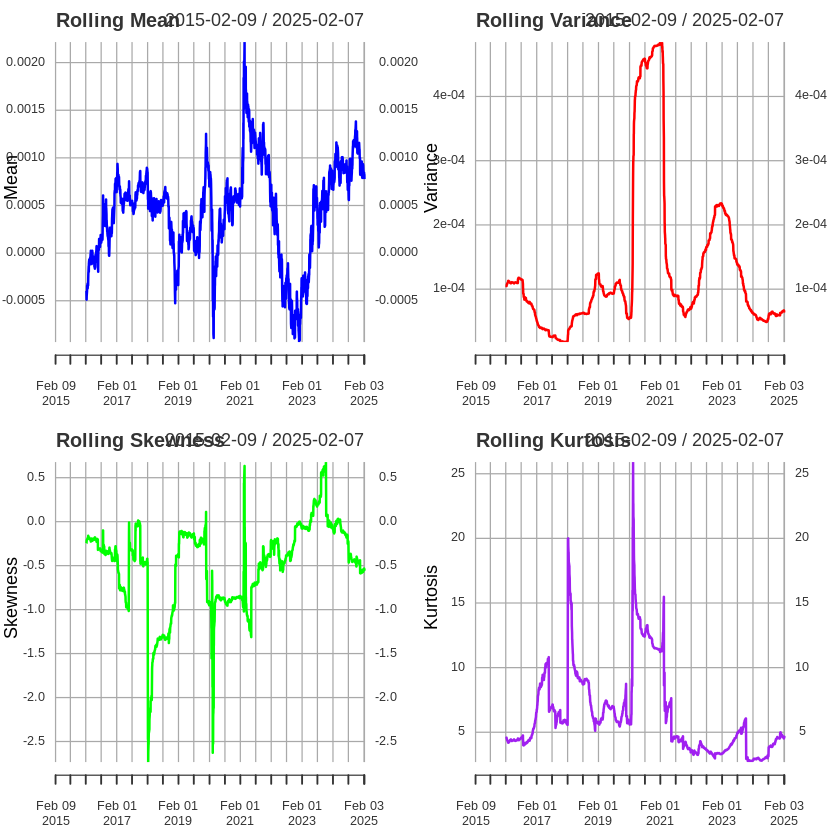

In [ ]:
# Define rolling window size (e.g., 252 trading days ~ 1 year)
window_size <- 252

# Calculate rolling statistics
roll_mean <- rollapply(log_returns, width = window_size, FUN = mean, align = "right", fill = NA)
roll_var <- rollapply(log_returns, width = window_size, FUN = var, align = "right", fill = NA)
roll_skewness <- rollapply(log_returns, width = window_size, FUN = skewness, align = "right", fill = NA)
roll_kurtosis <- rollapply(log_returns, width = window_size, FUN = kurtosis, align = "right", fill = NA)

# Download a good graph
png("rolling_statistics_yearly.png", width = 1500, height = 900, res=130)
par(mfrow = c(2, 2), mar = c(4, 4, 5, 5))
plot(roll_mean, main = "Rolling Mean", col = "blue", ylab = "Mean", xlab = "Date", cex.main = 0.9, cex.lab = 0.8, cex.axis = 0.7)
plot(roll_var, main = "Rolling Variance", col = "red", ylab = "Variance", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_skewness, main = "Rolling Skewness", col = "green", ylab = "Skewness", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_kurtosis, main = "Rolling Kurtosis", col = "purple", ylab = "Kurtosis", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
dev.off()

# Plot rolling statistics in a 2x2 layout
par(mfrow = c(2, 2), mar = c(4, 4, 5, 5))
plot(roll_mean, main = "Rolling Mean", col = "blue", ylab = "Mean", xlab = "Date", cex.main = 0.9, cex.lab = 0.8, cex.axis = 0.7)
plot(roll_var, main = "Rolling Variance", col = "red", ylab = "Variance", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_skewness, main = "Rolling Skewness", col = "green", ylab = "Skewness", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_kurtosis, main = "Rolling Kurtosis", col = "purple", ylab = "Kurtosis", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)

In [ ]:
# Define rolling window size (e.g., 21 trading days ~ 1 month)
window_size <- 21

# Calculate rolling statistics
roll_mean <- rollapply(log_returns, width = window_size, FUN = mean, align = "right", fill = NA)
roll_var <- rollapply(log_returns, width = window_size, FUN = var, align = "right", fill = NA)
roll_skewness <- rollapply(log_returns, width = window_size, FUN = skewness, align = "right", fill = NA)
roll_kurtosis <- rollapply(log_returns, width = window_size, FUN = kurtosis, align = "right", fill = NA)

# Plot rolling statistics in a 2x2 layout

png("rolling_statistics_monthly.png", width = 1500, height = 900, res=130)
par(mfrow = c(2, 2), mar = c(4, 4, 5, 5))
plot(roll_mean, main = "Rolling Mean", col = "blue", ylab = "Mean", xlab = "Date", cex.main = 0.9, cex.lab = 0.8, cex.axis = 0.7)
plot(roll_var, main = "Rolling Variance", col = "red", ylab = "Variance", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_skewness, main = "Rolling Skewness", col = "green", ylab = "Skewness", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_kurtosis, main = "Rolling Kurtosis", col = "purple", ylab = "Kurtosis", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
dev.off()

pdf 
  2

pdf 
  2

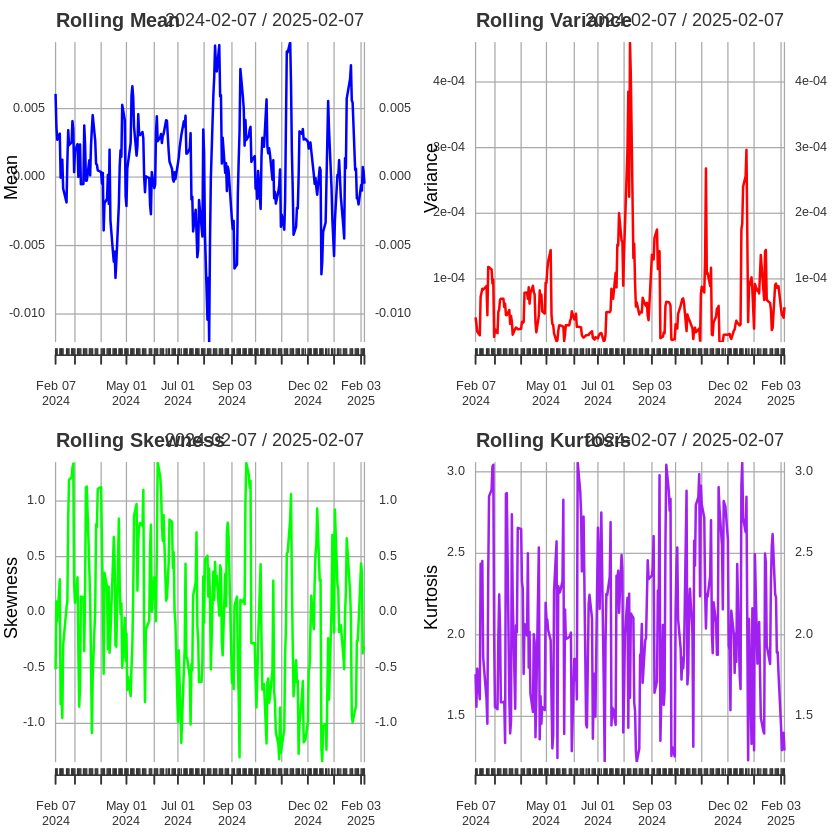

In [ ]:
# Define rolling window size (e.g., 252 trading days ~ 1 year)
window_size <- 5

# Calculate rolling statistics
roll_mean <- tail(rollapply(log_returns, width = window_size, FUN = mean, align = "right", fill = NA), 252)
roll_var <- tail(rollapply(log_returns, width = window_size, FUN = var, align = "right", fill = NA), 252)
roll_skewness <- tail(rollapply(log_returns, width = window_size, FUN = skewness, align = "right", fill = NA), 252)
roll_kurtosis <- tail(rollapply(log_returns, width = window_size, FUN = kurtosis, align = "right", fill = NA), 252)

# Download a good graph
png("rolling_statistics_5_day.png", width = 1500, height = 900, res=130)
par(mfrow = c(2, 2), mar = c(4, 4, 5, 5))
plot(roll_mean, main = "Rolling Mean", col = "blue", ylab = "Mean", xlab = "Date", cex.main = 0.9, cex.lab = 0.8, cex.axis = 0.7)
plot(roll_var, main = "Rolling Variance", col = "red", ylab = "Variance", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_skewness, main = "Rolling Skewness", col = "green", ylab = "Skewness", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_kurtosis, main = "Rolling Kurtosis", col = "purple", ylab = "Kurtosis", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
dev.off()

# Plot rolling statistics in a 2x2 layout
par(mfrow = c(2, 2), mar = c(4, 4, 5, 5))
plot(roll_mean, main = "Rolling Mean", col = "blue", ylab = "Mean", xlab = "Date", cex.main = 0.9, cex.lab = 0.8, cex.axis = 0.7)
plot(roll_var, main = "Rolling Variance", col = "red", ylab = "Variance", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_skewness, main = "Rolling Skewness", col = "green", ylab = "Skewness", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_kurtosis, main = "Rolling Kurtosis", col = "purple", ylab = "Kurtosis", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)

pdf 
  2

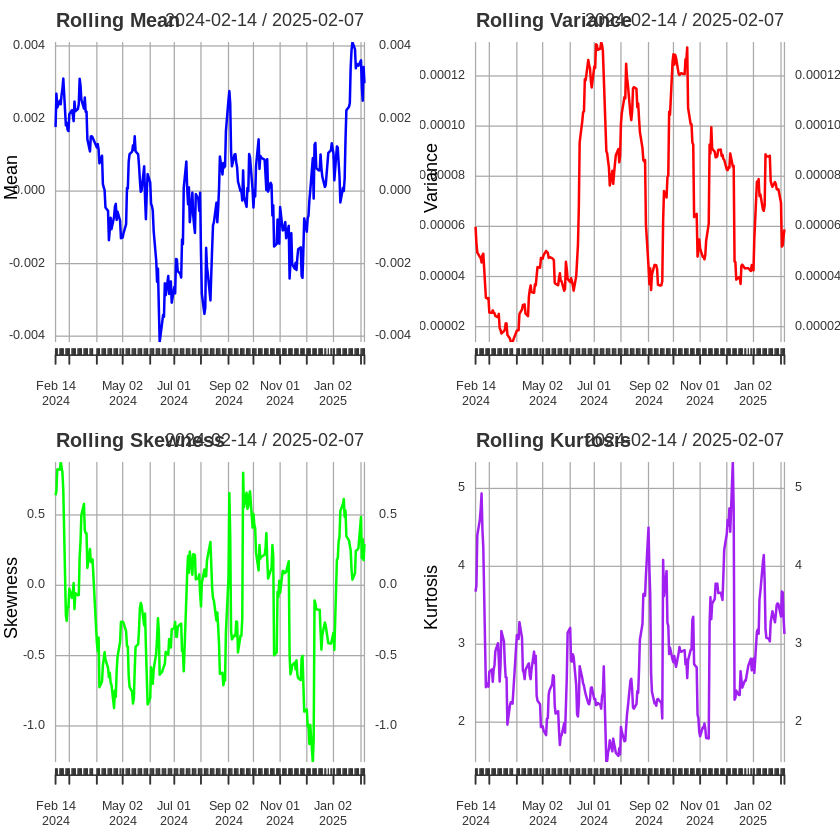

In [ ]:
# Define rolling window size (e.g., 252 trading days ~ 1 year)
window_size <- 21

# Calculate rolling statistics
roll_mean <- tail(rollapply(log_returns, width = window_size, FUN = mean, align = "right", fill = NA), 252)
roll_var <- tail(rollapply(log_returns, width = window_size, FUN = var, align = "right", fill = NA), 252)
roll_skewness <- tail(rollapply(log_returns, width = window_size, FUN = skewness, align = "right", fill = NA), 252)
roll_kurtosis <- tail(rollapply(log_returns, width = window_size, FUN = kurtosis, align = "right", fill = NA), 252)

# Download a good graph
png("rolling_statistics_monthly.png", width = 1500, height = 900, res=130)
par(mfrow = c(2, 2), mar = c(4, 4, 5, 5))
plot(roll_mean, main = "Rolling Mean", col = "blue", ylab = "Mean", xlab = "Date", cex.main = 0.9, cex.lab = 0.8, cex.axis = 0.7)
plot(roll_var, main = "Rolling Variance", col = "red", ylab = "Variance", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_skewness, main = "Rolling Skewness", col = "green", ylab = "Skewness", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_kurtosis, main = "Rolling Kurtosis", col = "purple", ylab = "Kurtosis", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
dev.off()

# Plot rolling statistics in a 2x2 layout
par(mfrow = c(2, 2), mar = c(4, 4, 5, 5))
plot(roll_mean, main = "Rolling Mean", col = "blue", ylab = "Mean", xlab = "Date", cex.main = 0.9, cex.lab = 0.8, cex.axis = 0.7)
plot(roll_var, main = "Rolling Variance", col = "red", ylab = "Variance", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_skewness, main = "Rolling Skewness", col = "green", ylab = "Skewness", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)
plot(roll_kurtosis, main = "Rolling Kurtosis", col = "purple", ylab = "Kurtosis", xlab = "Date", cex.main = 0.9, cex.lab = 1, cex.axis = 0.7)

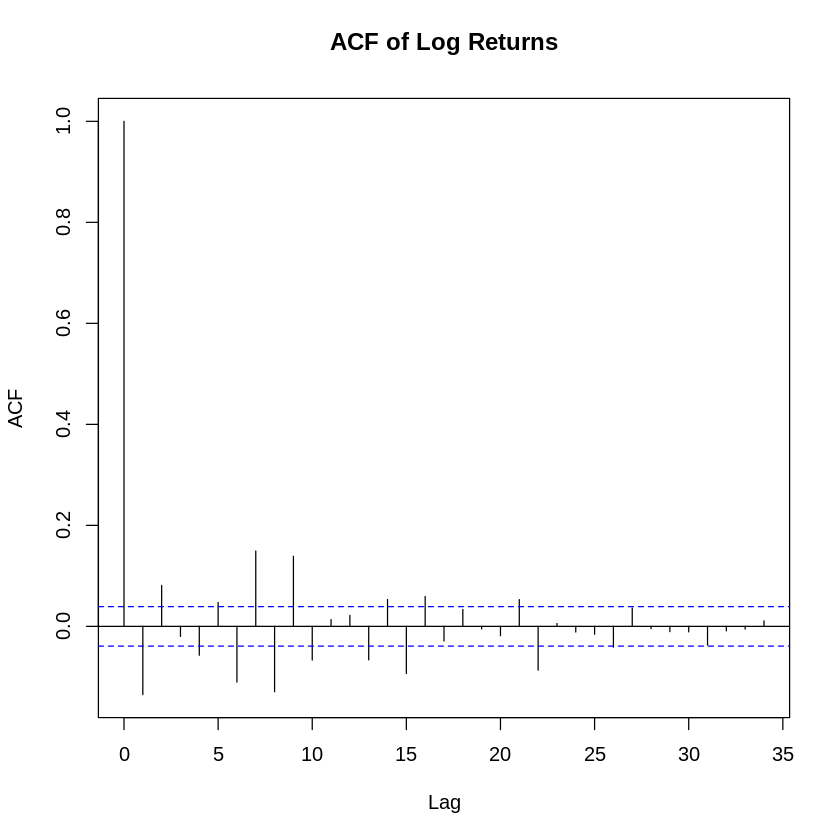

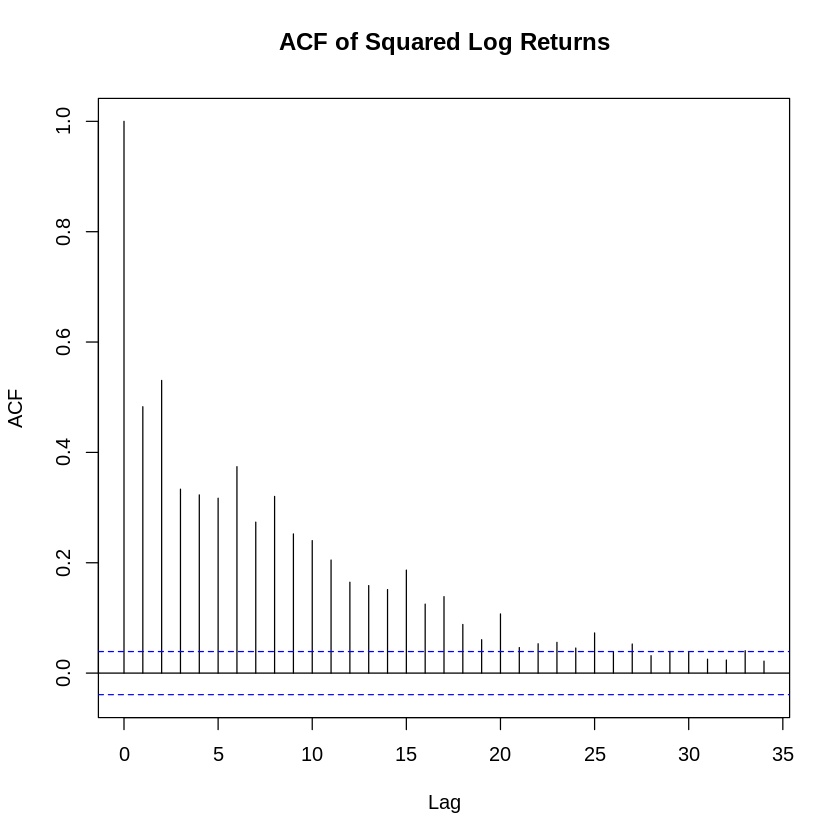

In [ ]:
# Plot the ACF of returns and squared returns
# par(mfrow = c(2, 2))  # Set up a 1x2 plotting grid

acf(log_returns, main = "ACF of Log Returns")
acf(log_returns^2, main = "ACF of Squared Log Returns")

### Log-likelihood and simulation

In [ ]:
###############################################
## 1. Log-Likelihood Function                ##
###############################################

loglik_garch <- function(params, R, fix_theta = FALSE) {
  n <- length(R)

  if (fix_theta) {
    mu    <- params[1]
    omega <- params[2]
    alpha <- params[3]
    beta  <- params[4]
    theta <- 0
  } else {
    mu    <- params[1]
    omega <- params[2]
    alpha <- params[3]
    beta  <- params[4]
    theta <- params[5]
  }
  if (omega <= 0 || alpha < 0 || beta < 0 || alpha * (1+theta^2) + beta >= 1) return(1e+10)
  sigma2 <- numeric(n)
  sigma2[1] <- var(R)
  if (!is.finite(sigma2[1]) || sigma2[1] < 1e-8) sigma2[1] <- 1e-8

  for (t in 2:n) {
    sigma2[t] <- omega + alpha * (R[t - 1] - theta * sqrt(sigma2[t - 1]))^2 + beta * sigma2[t - 1]
  }

  ll <- - 0.5 * sum(log(2 * pi) + log(sigma2) + ((R - mu)^2) / sigma2)
  if (!is.finite(ll)) return(1e+10)
  return(-ll)
}

###############################################
## 2. Simulation Function                    ##
###############################################

simulate_garch <- function(psi, T, burnin = 250, dist = "norm", nu = 10) {
  # Extract parameters from psi:
  mu    <- psi[1]
  omega <- psi[2]
  alpha <- psi[3]
  beta  <- psi[4]
  theta <- psi[5]

  total <- T + burnin
  sigma2 <- numeric(total)
  R      <- numeric(total)

  # Initialize sigma2[1] with the approximate unconditional variance.
  denom <- 1 - beta - alpha * (1 + theta^2)
  if (denom > 0) {
    sigma2[1] <- omega / denom
  } else {
    sigma2[1] <- omega  # fallback if the stationarity condition is not met.
  }
  if (!is.finite(sigma2[1]) || sigma2[1] < 1e-8) sigma2[1] <- 1e-8

  # Generate innovations.
  if (dist == "norm") {
    z <- rnorm(total)
  } else if (dist == "stdT") {
    # Standardized t-distribution (with variance equal to 1).
    z <- rt(total, df = nu) / sqrt(nu / (nu - 2))
  }

  # Generate the series recursively.
  R[1] <- mu + sqrt(sigma2[1]) * z[1]
  for (t in 2:total) {
    sigma2[t] <- omega + alpha * (R[t - 1] - theta * sqrt(sigma2[t - 1]))^2 + beta * sigma2[t - 1]
    if (!is.finite(sigma2[t]) || sigma2[t] < 1e-8) sigma2[t] <- 1e-8
    R[t] <- mu + sqrt(sigma2[t]) * z[t]
  }

  # Remove the burn-in period.
  R      <- R[(burnin + 1):total]
  sigma2 <- sigma2[(burnin + 1):total]

  return(list(R = R, sigma2 = sigma2))
}

# 2

### 2(a)



#### T=250 simulations for normal distribution

Next code runs approx 7.5 mins for 500 reps

In [ ]:
###############################################
## 2(a) Simulation with Normal Innovations    ##
###############################################

set.seed(123)
reps <- 500
sample_sizes <- c(250)
designs <- list(
  design1 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.9, theta = 0),
  design2 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.6, theta = 0.2)  # corrected theta from 2 to 0.2
)

results_a_250 <- list()

for (design_name in names(designs)) {
  psi_true <- designs[[design_name]]
  results_a_250[[design_name]] <- list()

  start_time <- Sys.time()

  # Pre-allocate a matrix for storing estimated parameters over replications
  est_params_mat <- matrix(NA, nrow = reps, ncol = 5)
  colnames(est_params_mat) <- c("mu", "omega", "alpha", "beta", "theta")
  opt_steps <- numeric(reps)

  # Loop over replications without parallelisation
  for (r in 1:reps) {
    sim_data <- simulate_garch(psi = psi_true, T = 250, burnin = 100, dist = "norm")
    R_sim <- sim_data$R
    init_params <- psi_true
    lower_bounds <- c(-Inf, 1e-8, 0, 0, -Inf)

    opt <- optim(par = init_params, fn = loglik_garch, R = R_sim,
                 method = "L-BFGS-B", lower = lower_bounds, control = list(maxit = 10000))

    opt_steps[r] <- opt$counts[1]

    est_params_mat[r, ] <- opt$par
  }

  results_a_250[[design_name]][["T250"]] <- est_params_mat
  cat(250, 'samples at psi', design_name, 'are done (on avg',
      as.character(mean(opt_steps)), 'to convergence)\n')
}

###############################################
## Summarize simulation results (mean and standard deviation) for part (a)
###############################################
sim_summary_a_250 <- list()

for (design_name in names(results_a_250)) {
  sim_summary_a_250[[design_name]] <- list()
  for (T_sample in names(results_a_250[[design_name]])) {
    est_params <- results_a_250[[design_name]][[T_sample]]
    sim_mean <- colMeans(est_params, na.rm = TRUE)
    sim_sd   <- apply(est_params, 2, sd, na.rm = TRUE)
    sim_summary_a_250[[design_name]][[T_sample]] <- list(mean = sim_mean, sd = sim_sd)
    cat("Design:", design_name, "Sample size:", T_sample, "\n")
    print(sim_summary_a_250[[design_name]][[T_sample]])
  }
}

# design1 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.9, theta = 0),
# design2 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.6, theta = 0.2)  # corrected theta from 2 to 0.2

250 samples at psi design1 are done (on avg 63.188 to convergence)
250 samples at psi design2 are done (on avg 50.704 to convergence)
Design: design1 Sample size: T250 
$mean
         mu       omega       alpha        beta       theta 
0.001035811 0.029518423 0.052396513 0.778269552 0.060925450 

$sd
        mu      omega      alpha       beta      theta 
0.02811025 0.03481688 0.04772119 0.22316485 0.81117973 

Design: design2 Sample size: T250 
$mean
          mu        omega        alpha         beta        theta 
-0.000262662  0.010960097  0.053452700  0.558454408  0.195777047 

$sd
         mu       omega       alpha        beta       theta 
0.010823282 0.003528833 0.046272875 0.138561363 0.345821591 



In [ ]:
write.csv(results_a_250$design1$T250, "ML_T250_psi1.csv", row.names = FALSE)
write.csv(results_a_250$design2$T250, "ML_T250_psi2.csv", row.names = FALSE)

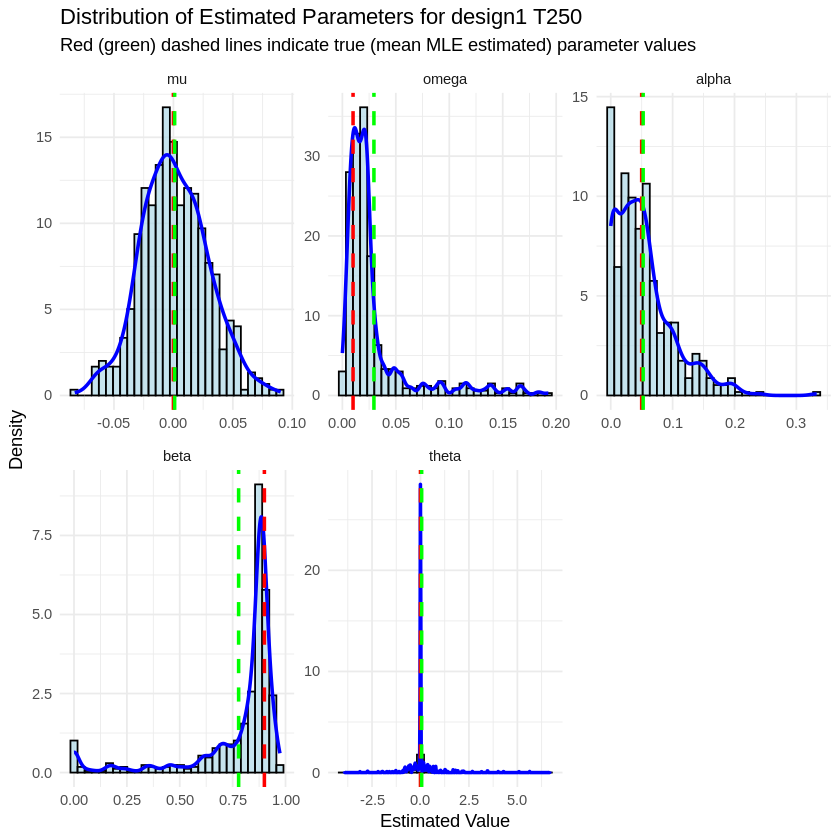

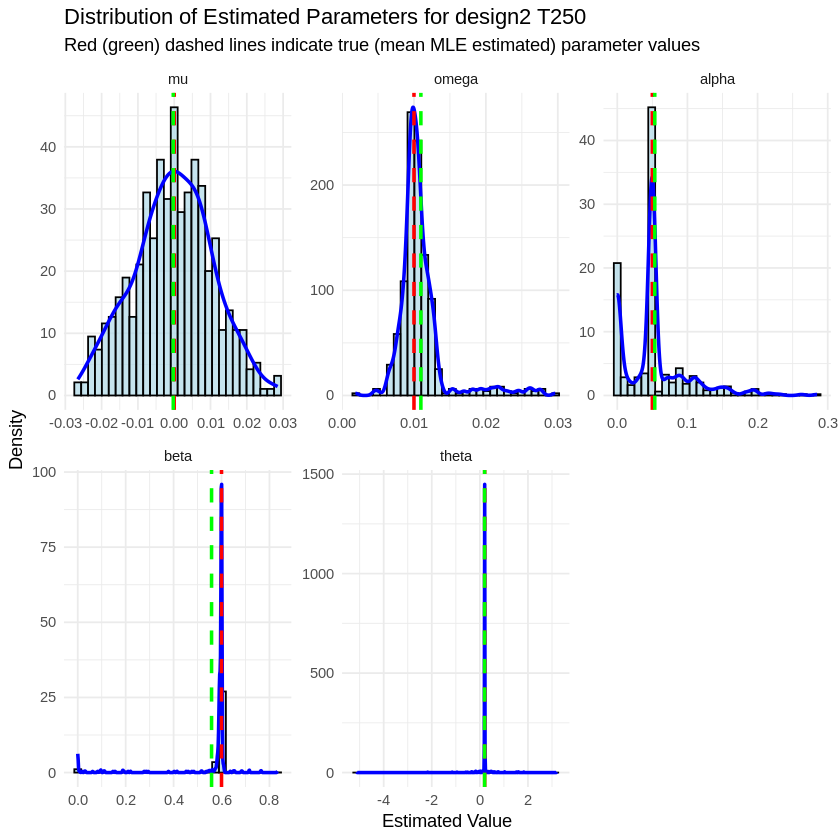

In [ ]:
# Load required libraries
library(ggplot2)
library(reshape2)  # or use tidyr::pivot_longer

# Loop over each design to create the plots
for (design_name in names(results_a_250)) {
  # Extract the matrix of estimated parameters for sample size 250
  est_mat <- results_a_250[[design_name]][["T250"]]

  # Convert the matrix to a data.frame
  est_df <- as.data.frame(est_mat)

  # Add a column for replication index (if desired)
  est_df$Replication <- 1:nrow(est_df)

  # Reshape to long format so that each row is one parameter estimate.
  # The resulting data frame has columns: Replication, Parameter, Estimate.
  est_long <- melt(est_df, id.vars = "Replication",
                   variable.name = "Parameter",
                   value.name = "Estimate")

  # Extract the true parameter values for this design.
  # Assume designs[[design_name]] is a named vector with names matching "mu", "omega", etc.
  true_params <- designs[[design_name]]

  # For convenience, add a column for the true value corresponding to each parameter.
  # (This works because true_params is named; we convert the factor to character.)
  est_long$TrueValue <- true_params[as.character(est_long$Parameter)]
  est_long$MeanValue <- colMeans(results_a_250[[design_name]][[T_sample]], na.rm = TRUE)[as.character(est_long$Parameter)]

  # Create a ggplot object with facets for each parameter.
  p <- ggplot(est_long, aes(x = Estimate)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue",
                   color = "black", alpha = 0.7) +
    geom_density(color = "blue", size = 1) +
    geom_vline(aes(xintercept = TrueValue), color = "red",
               linetype = "dashed", size = 1) +
    geom_vline(aes(xintercept = MeanValue), color = "green",
               linetype = "dashed", size = 1) +
    facet_wrap(~ Parameter, scales = "free") +
    labs(title = paste("Distribution of Estimated Parameters for", design_name, "T250"),
         subtitle = "Red (green) dashed lines indicate true (mean MLE estimated) parameter values",
         x = "Estimated Value",
         y = "Density") +
    theme_minimal()

  # Print the plot
  print(p)
}


#### Simulations T=1000 for Normal distribution

Next code runs approx 15 mins

In [ ]:
###############################################
## 2(a) Simulation with Normal Innovations    ##
###############################################

set.seed(123)
reps <- 500
sample_sizes <- c(1000)
designs <- list(
  design1 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.9, theta = 0),
  design2 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.6, theta = 0.2)  # corrected theta from 2 to 0.2
)

results_a_1000 <- list()

for (design_name in names(designs)) {
  psi_true <- designs[[design_name]]
  results_a_1000[[design_name]] <- list()

  start_time <- Sys.time()

  # Pre-allocate a matrix for storing estimated parameters over replications
  est_params_mat <- matrix(NA, nrow = reps, ncol = 5)
  colnames(est_params_mat) <- c("mu", "omega", "alpha", "beta", "theta")
  opt_steps <- numeric(reps)

  # Loop over replications without parallelisation
  for (r in 1:reps) {
    sim_data <- simulate_garch(psi = psi_true, T = 1000, burnin = 100, dist = "norm")
    R_sim <- sim_data$R
    init_params <- psi_true
    lower_bounds <- c(-Inf, 1e-8, 0, 0, -Inf)

    opt <- optim(par = init_params, fn = loglik_garch, R = R_sim,
                 method = "L-BFGS-B", lower = lower_bounds, control = list(maxit = 10000))

    opt_steps[r] <- opt$counts[1]

    est_params_mat[r, ] <- opt$par
  }

  results_a_1000[[design_name]][["T1000"]] <- est_params_mat
  cat(1000, 'samples at psi', design_name, 'are done (on avg',
      as.character(mean(opt_steps)), 'to convergence)\n')
}

###############################################
## Summarize simulation results (mean and standard deviation) for part (a)
###############################################
sim_summary_a_1000 <- list()

for (design_name in names(results_a_1000)) {
  sim_summary_a_1000[[design_name]] <- list()
  for (T_sample in names(results_a_1000[[design_name]])) {
    est_params <- results_a_1000[[design_name]][[T_sample]]
    sim_mean <- colMeans(est_params, na.rm = TRUE)
    sim_sd   <- apply(est_params, 2, sd, na.rm = TRUE)
    sim_summary_a_1000[[design_name]][[T_sample]] <- list(mean = sim_mean, sd = sim_sd)
    cat("Design:", design_name, "Sample size:", T_sample, "\n")
    print(sim_summary_a_1000[[design_name]][[T_sample]])
  }
}

# design1 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.9, theta = 0),
# design2 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.6, theta = 0.2)  # corrected theta from 2 to 0.2

1000 samples at psi design1 are done (on avg 62.212 to convergence)
1000 samples at psi design2 are done (on avg 46.296 to convergence)
Design: design1 Sample size: T1000 
$mean
           mu         omega         alpha          beta         theta 
 0.0001696769  0.0163164310  0.0531523539  0.8630329697 -0.0083957921 

$sd
        mu      omega      alpha       beta      theta 
0.01338555 0.01695716 0.02048435 0.09723415 0.19267219 

Design: design2 Sample size: T1000 
$mean
           mu         omega         alpha          beta         theta 
-0.0004677853  0.0104913574  0.0499668355  0.5822180258  0.2073029156 

$sd
         mu       omega       alpha        beta       theta 
0.005435127 0.002389304 0.022593857 0.084911508 0.086247907 



In [ ]:
write.csv(results_a_1000$design1$T1000, "ML_T1000_psi1.csv", row.names = FALSE)
write.csv(results_a_1000$design2$T1000, "ML_T1000_psi2.csv", row.names = FALSE)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


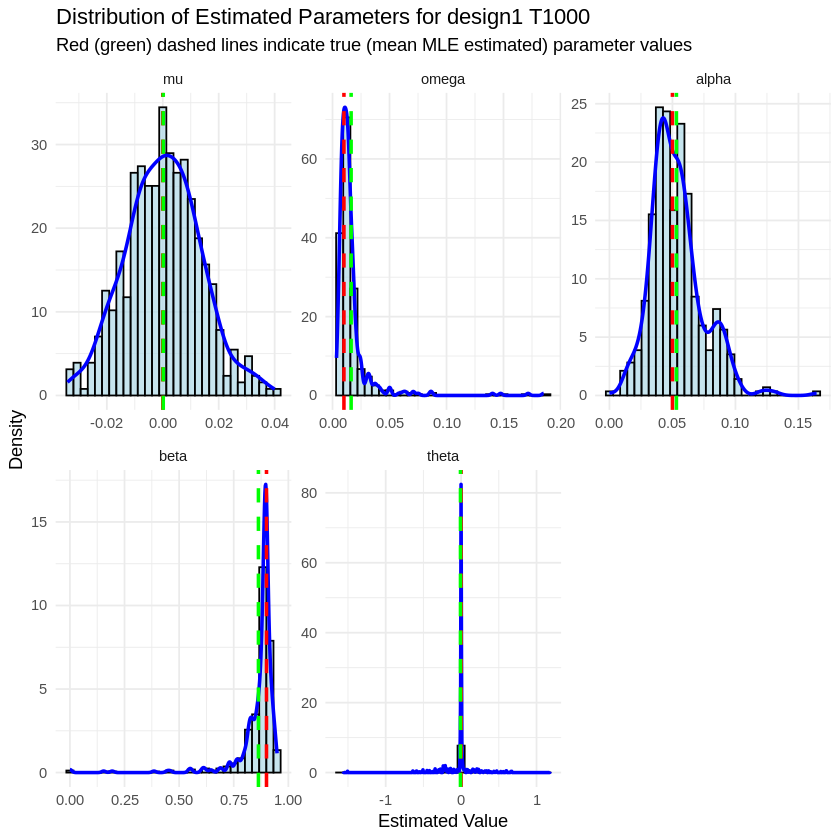

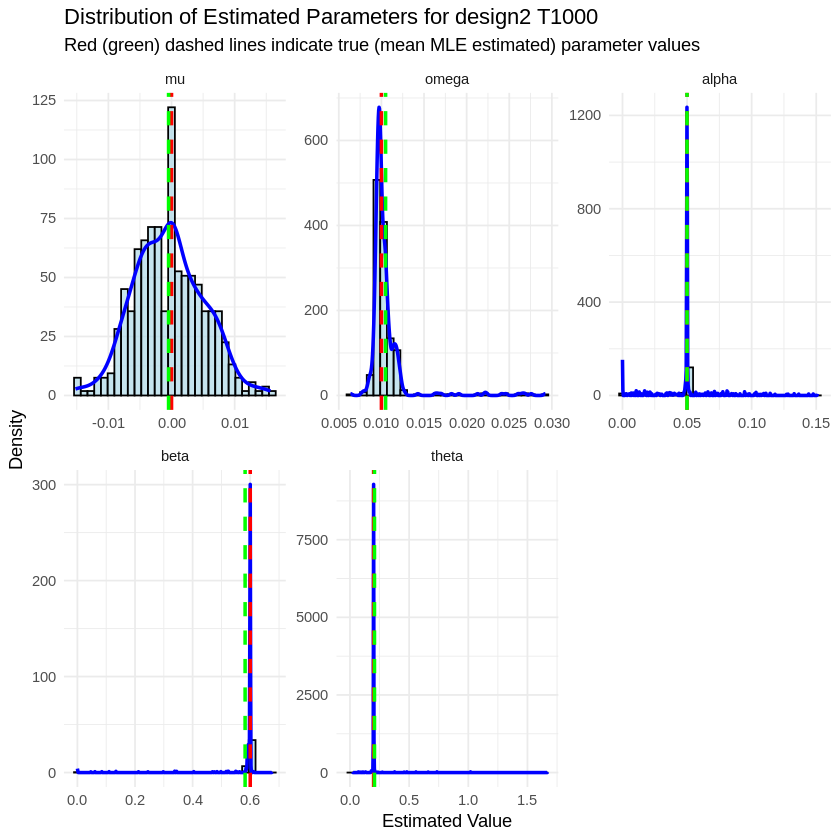

In [ ]:
# Loop over each design to create the plots
for (design_name in names(results_a_1000)) {
  # Extract the matrix of estimated parameters for sample size 1000
  est_mat <- results_a_1000[[design_name]][["T1000"]]

  # Convert the matrix to a data.frame
  est_df <- as.data.frame(est_mat)

  # Add a column for replication index (if desired)
  est_df$Replication <- 1:nrow(est_df)

  # Reshape to long format so that each row is one parameter estimate.
  # The resulting data frame has columns: Replication, Parameter, Estimate.
  est_long <- melt(est_df, id.vars = "Replication",
                   variable.name = "Parameter",
                   value.name = "Estimate")

  # Extract the true parameter values for this design.
  # Assume designs[[design_name]] is a named vector with names matching "mu", "omega", etc.
  true_params <- designs[[design_name]]

  # For convenience, add a column for the true value corresponding to each parameter.
  # (This works because true_params is named; we convert the factor to character.)
  est_long$TrueValue <- true_params[as.character(est_long$Parameter)]
  est_long$MeanValue <- colMeans(results_a_1000[[design_name]][[T_sample]], na.rm = TRUE)[as.character(est_long$Parameter)]

  # Create a ggplot object with facets for each parameter.
  p <- ggplot(est_long, aes(x = Estimate)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue",
                   color = "black", alpha = 0.7) +
    geom_density(color = "blue", size = 1) +
    geom_vline(aes(xintercept = TrueValue), color = "red",
               linetype = "dashed", size = 1) +
    geom_vline(aes(xintercept = MeanValue), color = "green",
               linetype = "dashed", size = 1) +
    facet_wrap(~ Parameter, scales = "free") +
    labs(title = paste("Distribution of Estimated Parameters for", design_name, "T1000"),
         subtitle = "Red (green) dashed lines indicate true (mean MLE estimated) parameter values",
         x = "Estimated Value",
         y = "Density") +
    theme_minimal()

  # Print the plot
  print(p)
}


#### NAGARCH(1,1)

In [ ]:
psi_design2 <- c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.6, theta = 0.2)

# Sample sizes (after burn-in)
sample_sizes <- c(250, 1000)

# Number of replications (use 100 for this example; increase as desired)
n_rep <- 100

# We'll store QMLE estimates (which assume normal errors) for each sample size.
results_QMLE <- list()

# IMPORTANT: Adjust the bounds for theta!
lower_bounds_full <- c(-Inf, 1e-12, 0, 0, -Inf)
upper_bounds_full <- c(Inf, Inf, 1, 1, Inf)

# Loop over sample sizes.
for (T_sample in sample_sizes) {
  # Pre-allocate a matrix to store estimated parameters for each replication.
  est_mat <- matrix(NA, nrow = n_rep, ncol = 5)
  colnames(est_mat) <- c("mu", "omega", "alpha", "beta", "theta")

  for (r in 1:n_rep) {
    # Simulate data with standardized T(10) innovations.
    sim <- simulate_garch(psi = psi_design2, T = T_sample, burnin = 250, dist = "norm", nu = 10)
    sim_returns <- sim$R

    # --- QMLE Estimation Using the NAGARCH Model via fGARCH with submodel "NGARCH" ---
    # spec_nagarch <- ugarchspec(
    #   variance.model = list(model = "fGARCH", submodel = "NGARCH", garchOrder = c(1,1)),
    #   mean.model = list(armaOrder = c(0,0), include.mean = TRUE),
    #   distribution.model = "norm"  # QMLE: assume normal innovations.
    # )
    spec_nagarch <- ugarchspec(
      variance.model = list(model = "fGARCH", submodel = "NAGARCH", garchOrder = c(1, 1)),
      mean.model     = list(armaOrder = c(0, 0), include.mean = TRUE)
    )

    fit <- ugarchfit(spec = spec_nagarch, data = sim_returns, solver = "hybrid",
                     solver.control = list(trace = 0))

    # Extract estimated parameters.
    # For the NGARCH submodel, the parameters are usually named: "mu", "omega", "alpha1", "beta1", and "theta"
    coefs <- coef(fit)
    est_mat[r, "mu"]    <- coefs[1]
    est_mat[r, "omega"] <- coefs[1]
    est_mat[r, "alpha"] <- coefs[3]
    est_mat[r, "beta"]  <- coefs[4]
    # Use the correct name for the leverage parameter: here we assume it is "theta"
    est_mat[r, "theta"] <- coefs[5]
  }

  results_QMLE[[paste0("T", T_sample)]] <- est_mat
  cat("Completed QMLE estimation (with normal QMLE) for sample size T =", T_sample, "\n")
}

# --- Compute Simulation Summary Statistics ---

cat("True parameters:", psi_design2, "\n")
for (T_sample in sample_sizes) {
  est_mat <- results_QMLE[[paste0("T", T_sample)]]
  sim_mean <- colMeans(est_mat, na.rm = TRUE)
  sim_sd <- apply(est_mat, 2, sd, na.rm = TRUE)
  cat("Sample Size:", T_sample, "\n")
  print(list(mean = sim_mean, sd = sim_sd))
}

Warning message in sqrt(diag(fit$robust.cvar)):
“NaNs produced”


Completed QMLE estimation (with normal QMLE) for sample size T = 250 


ERROR: Error in robustvcv(fun = f, pars = ipars[estidx, 1], nlag = nlag, hess = fit$hessian, : object 'B' not found


In [ ]:
cat("True parameters:", psi_design2, "\n")
for (T_sample in sample_sizes) {
  est_mat <- results_QMLE[[paste0("T", T_sample)]]
  sim_mean <- colMeans(est_mat, na.rm = TRUE)
  sim_sd <- apply(est_mat, 2, sd, na.rm = TRUE)
  cat("Sample Size:", T_sample, "\n")
  print(list(mean = sim_mean, sd = sim_sd))
}

True parameters: 0 0.01 0.05 0.6 0.2 
Sample Size: 250 
$mean
          mu        omega        alpha         beta        theta 
0.0005862758 0.0005862758 0.0192842473 0.8502655318 0.1015537338 

$sd
        mu      omega      alpha       beta      theta 
0.01110605 0.01110605 0.04461843 0.26019071 3.81019355 



ERROR: Error in colMeans(est_mat, na.rm = TRUE): 'x' must be an array of at least two dimensions


In [ ]:
coefs[1]

mu 
0.002307861

### 2(b)


#### T=250 simulations for T(10) distribution (QMLE)

Estimated time 7.5 mins for 500 reps

In [ ]:
###############################################
## 2(b) Simulation with Standardised T(10) Innovations    ##
###############################################

set.seed(123)
reps <- 500
sample_sizes <- c(250)
designs <- list(
  design1 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.9, theta = 0),
  design2 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.6, theta = 0.2)  # corrected theta from 2 to 0.2
)

results_b_250 <- list()

for (design_name in names(designs)) {
  psi_true <- designs[[design_name]]
  results_b_250[[design_name]] <- list()

  start_time <- Sys.time()

  # Pre-allocate a matrix for storing estimated parameters over replications
  est_params_mat <- matrix(NA, nrow = reps, ncol = 5)
  colnames(est_params_mat) <- c("mu", "omega", "alpha", "beta", "theta")
  opt_steps <- numeric(reps)

  # Loop over replications without parallelisation
  for (r in 1:reps) {
    sim_data <- simulate_garch(psi = psi_true, T = 250, burnin = 100, dist = "stdT")
    R_sim <- sim_data$R
    init_params <- psi_true
    lower_bounds <- c(-Inf, 1e-8, 0, 0, -Inf)
    upper_bounds <- c(Inf, Inf, 1, 1, Inf)

    opt <- optim(par = init_params, fn = loglik_garch, R = R_sim,
                 method = "L-BFGS-B", lower = lower_bounds, upper = upper_bounds, control = list(maxit = 10000))

    opt_steps[r] <- opt$counts[1]

    est_params_mat[r, ] <- opt$par
  }

  results_b_250[[design_name]][["T250"]] <- est_params_mat
  cat(250, 'samples at psi', design_name, 'are done (on avg',
      as.character(mean(opt_steps)), 'to convergence)\n')
}

###############################################
## Summarize simulation results (mean and standard deviation) for part (a)
###############################################
sim_summary_b_250 <- list()

for (design_name in names(results_b_250)) {
  sim_summary_b_250[[design_name]] <- list()
  for (T_sample in names(results_b_250[[design_name]])) {
    est_params <- results_b_250[[design_name]][[T_sample]]
    sim_mean <- colMeans(est_params, na.rm = TRUE)
    sim_sd   <- apply(est_params, 2, sd, na.rm = TRUE)
    sim_summary_b_250[[design_name]][[T_sample]] <- list(mean = sim_mean, sd = sim_sd)
    cat("Design:", design_name, "Sample size:", T_sample, "\n")
    print(sim_summary_b_250[[design_name]][[T_sample]])
  }
}

# design1 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.9, theta = 0),
# design2 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.6, theta = 0.2)  # corrected theta from 2 to 0.2

250 samples at psi design1 are done (on avg 67.342 to convergence)
250 samples at psi design2 are done (on avg 53.776 to convergence)
Design: design1 Sample size: T250 
$mean
           mu         omega         alpha          beta         theta 
 0.0002451437  0.0298318909  0.0563790778  0.7656908187 -0.0446264420 

$sd
        mu      omega      alpha       beta      theta 
0.02737539 0.03462297 0.05590519 0.22621196 0.93479276 

Design: design2 Sample size: T250 
$mean
           mu         omega         alpha          beta         theta 
-0.0005498824  0.0109155299  0.0537620252  0.5551851144  0.2056219634 

$sd
         mu       omega       alpha        beta       theta 
0.010412465 0.003690133 0.052854148 0.142692702 0.368054964 



In [ ]:
# saving the results to not have to repeat simulations later
write.csv(results_b_250$design1$T250, "2b_ML_T250_psi1.csv", row.names = FALSE)
write.csv(results_b_250$design2$T250, "2b_ML_T250_psi2.csv", row.names = FALSE)

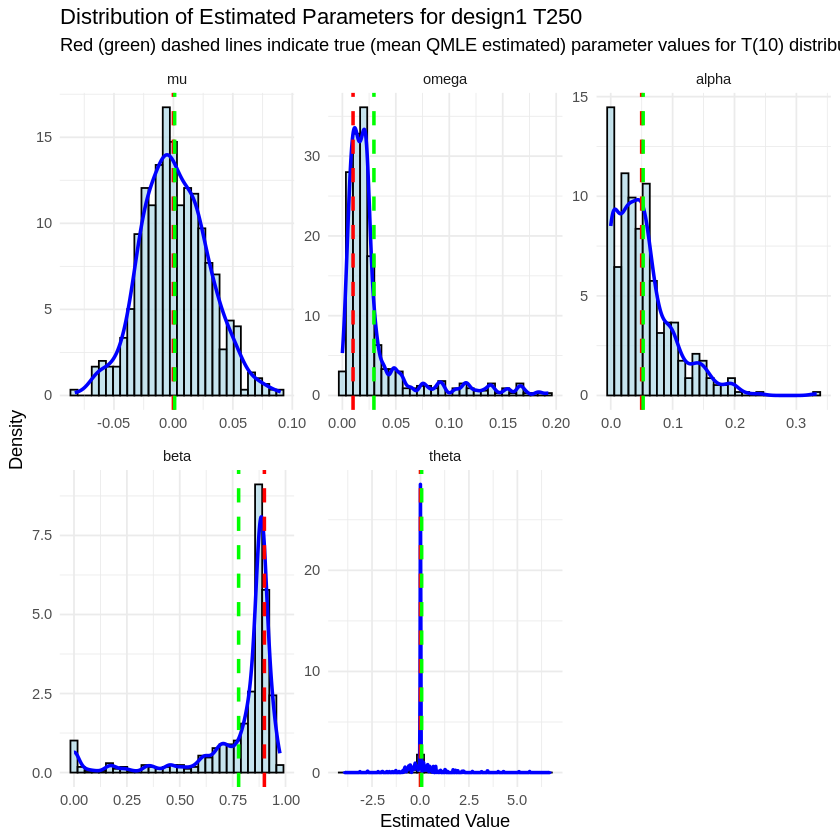

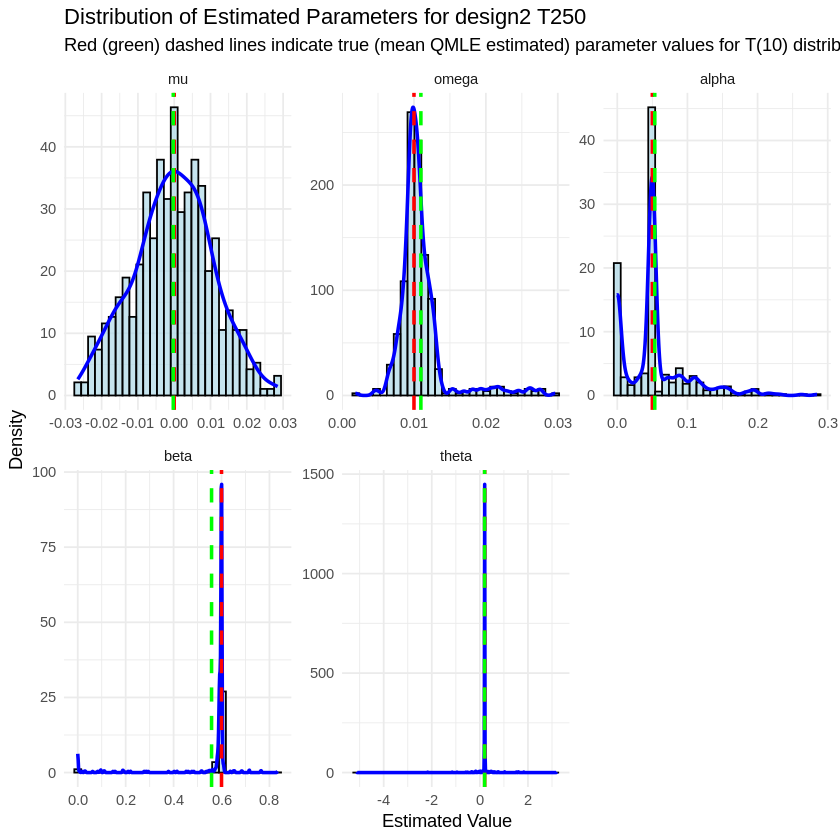

In [ ]:
for (design_name in names(results_b_250)) {
  est_mat <- results_a_250[[design_name]][["T250"]]
  est_df <- as.data.frame(est_mat)
  est_df$Replication <- 1:nrow(est_df)
  est_long <- melt(est_df, id.vars = "Replication",
                   variable.name = "Parameter",
                   value.name = "Estimate")
  true_params <- designs[[design_name]]
  est_long$TrueValue <- true_params[as.character(est_long$Parameter)]
  est_long$MeanValue <- colMeans(results_a_250[[design_name]][[T_sample]], na.rm = TRUE)[as.character(est_long$Parameter)]
  p <- ggplot(est_long, aes(x = Estimate)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue",
                   color = "black", alpha = 0.7) +
    geom_density(color = "blue", size = 1) +
    geom_vline(aes(xintercept = TrueValue), color = "red",
               linetype = "dashed", size = 1) +
    geom_vline(aes(xintercept = MeanValue), color = "green",
               linetype = "dashed", size = 1) +
    facet_wrap(~ Parameter, scales = "free") +
    labs(title = paste("Distribution of Estimated Parameters for", design_name, "T250"),
         subtitle = "Red (green) dashed lines indicate true (mean QMLE estimated) parameter values for T(10) distribution of innovations",
         x = "Estimated Value",
         y = "Density") +
    theme_minimal()
  print(p)
}

#### T=1000 simulations for T(10) distribution (QMLE)

In [ ]:
###############################################
## 2(b) Simulation with Standardised T(10) Innovations    ##
###############################################

set.seed(123)
sample_sizes <- c(1000)
results_b_1000 <- list()

for (design_name in names(designs)) {
  psi_true <- designs[[design_name]]
  results_b_1000[[design_name]] <- list()
  start_time <- Sys.time()
  est_params_mat <- matrix(NA, nrow = reps, ncol = 5)
  colnames(est_params_mat) <- c("mu", "omega", "alpha", "beta", "theta")
  opt_steps <- numeric(reps)

  # Loop over replications without parallelisation
  for (r in 1:reps) {
    sim_data <- simulate_garch(psi = psi_true, T = 1000, burnin = 100, dist = "stdT")
    R_sim <- sim_data$R
    init_params <- psi_true
    lower_bounds <- c(-Inf, 1e-8, 0, 0, -Inf)
    upper_bounds <- c(Inf, Inf, 1, 1, Inf)

    opt <- optim(par = init_params, fn = loglik_garch, R = R_sim,
                 method = "L-BFGS-B", lower = lower_bounds, upper = upper_bounds, control = list(maxit = 10000))

    opt_steps[r] <- opt$counts[1]

    est_params_mat[r, ] <- opt$par
  }

  results_b_1000[[design_name]][["T1000"]] <- est_params_mat
  cat(1000, 'samples at psi', design_name, 'are done (on avg',
      as.character(mean(opt_steps)), 'to convergence)\n')
}

###############################################
## Summarize simulation results (mean and standard deviation) for part (a)
###############################################
sim_summary_b_1000 <- list()

for (design_name in names(results_b_1000)) {
  sim_summary_b_1000[[design_name]] <- list()
  for (T_sample in names(results_b_1000[[design_name]])) {
    est_params <- results_b_1000[[design_name]][[T_sample]]
    sim_mean <- colMeans(est_params, na.rm = TRUE)
    sim_sd   <- apply(est_params, 2, sd, na.rm = TRUE)
    sim_summary_b_1000[[design_name]][[T_sample]] <- list(mean = sim_mean, sd = sim_sd)
    cat("Design:", design_name, "Sample size:", T_sample, "\n")
    print(sim_summary_b_1000[[design_name]][[T_sample]])
  }
}

# design1 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.9, theta = 0),
# design2 = c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.6, theta = 0.2)  # corrected theta from 2 to 0.2

1000 samples at psi design1 are done (on avg 63.864 to convergence)
1000 samples at psi design2 are done (on avg 45.122 to convergence)
Design: design1 Sample size: T1000 
$mean
           mu         omega         alpha          beta         theta 
-0.0007700896  0.0168395537  0.0534860026  0.8579791732 -0.0141421903 

$sd
        mu      omega      alpha       beta      theta 
0.01344378 0.01579397 0.02385897 0.09732432 0.24679954 

Design: design2 Sample size: T1000 
$mean
          mu        omega        alpha         beta        theta 
0.0002383615 0.0104278396 0.0495821562 0.5860807870 0.1938315843 

$sd
         mu       omega       alpha        beta       theta 
0.005289552 0.001884955 0.025234152 0.064180753 0.078638164 



In [ ]:
write.csv(results_b_1000$design1$T1000, "2b_ML_T1000_psi1.csv", row.names = FALSE)
write.csv(results_b_1000$design2$T1000, "2b_ML_T1000_psi2.csv", row.names = FALSE)

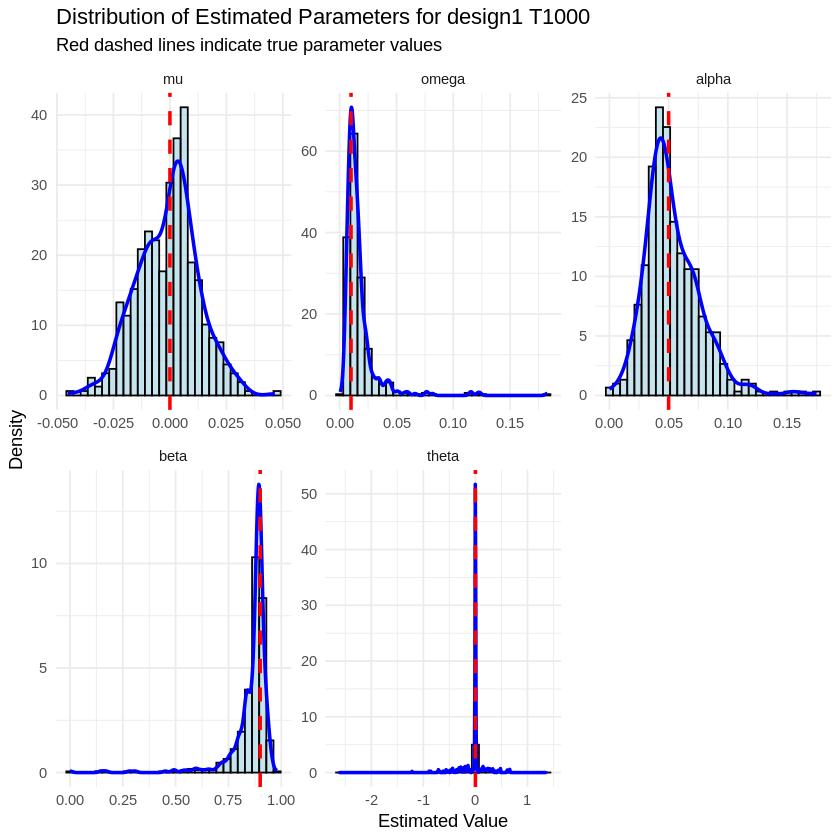

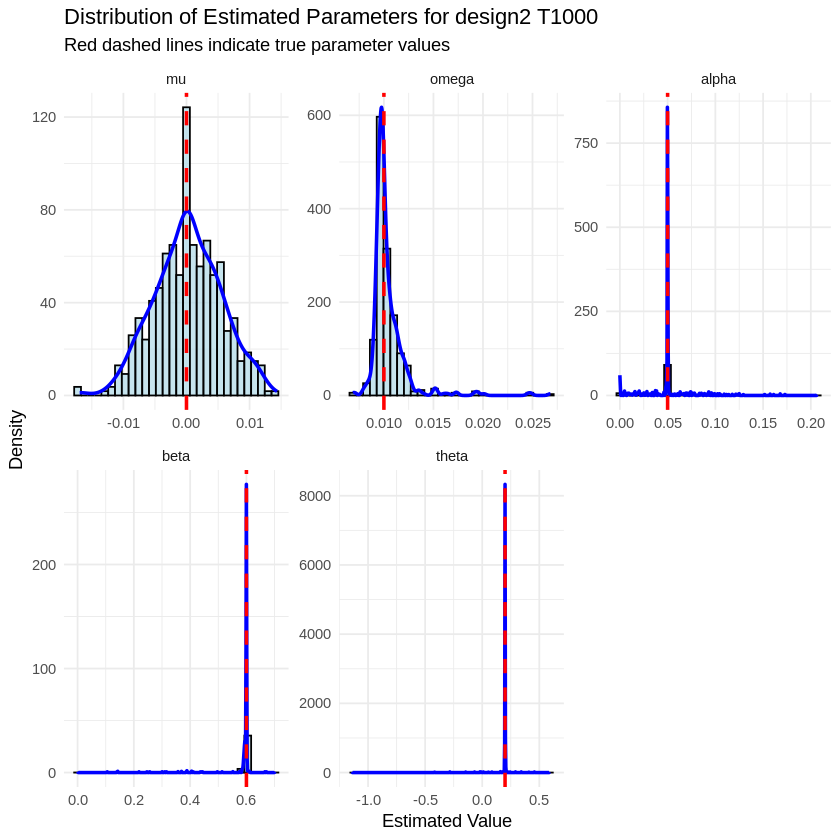

In [ ]:
# Loop over each design to create the plots
for (design_name in names(results_b_1000)) {
  # Extract the matrix of estimated parameters for sample size 1000
  est_mat <- results_b_1000[[design_name]][["T1000"]]

  # Convert the matrix to a data.frame
  est_df <- as.data.frame(est_mat)

  # Add a column for replication index (if desired)
  est_df$Replication <- 1:nrow(est_df)

  # Reshape to long format so that each row is one parameter estimate.
  # The resulting data frame has columns: Replication, Parameter, Estimate.
  est_long <- melt(est_df, id.vars = "Replication",
                   variable.name = "Parameter",
                   value.name = "Estimate")

  # Extract the true parameter values for this design.
  # Assume designs[[design_name]] is a named vector with names matching "mu", "omega", etc.
  true_params <- designs[[design_name]]

  # For convenience, add a column for the true value corresponding to each parameter.
  # (This works because true_params is named; we convert the factor to character.)
  est_long$TrueValue <- true_params[as.character(est_long$Parameter)]

  # Create a ggplot object with facets for each parameter.
  p <- ggplot(est_long, aes(x = Estimate)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "lightblue",
                   color = "black", alpha = 0.7) +
    geom_density(color = "blue", size = 1) +
    geom_vline(aes(xintercept = TrueValue), color = "red",
               linetype = "dashed", size = 1) +
    facet_wrap(~ Parameter, scales = "free") +
    labs(title = paste("Distribution of Estimated Parameters for", design_name, "T1000"),
         subtitle = "Red dashed lines indicate true parameter values",
         x = "Estimated Value",
         y = "Density") +
    theme_minimal()

  # Print the plot
  print(p)
}


#### NAGARCH

In [ ]:
# library(rugarch)
# library(xts)

# # --- Simulation Function (provided) ---
# simulate_garch <- function(psi, T, burnin = 250, dist = "norm", nu = 10) {
#   # Extract parameters from psi:
#   mu    <- psi[1]
#   omega <- psi[2]
#   alpha <- psi[3]
#   beta  <- psi[4]
#   theta <- psi[5]

#   total <- T + burnin
#   sigma2 <- numeric(total)
#   R      <- numeric(total)

#   # Initialize sigma2[1] with the approximate unconditional variance.
#   denom <- 1 - beta - alpha * (1 + theta^2)
#   if (denom > 0) {
#     sigma2[1] <- omega / denom
#   } else {
#     sigma2[1] <- omega  # fallback if stationarity condition is not met.
#   }
#   if (!is.finite(sigma2[1]) || sigma2[1] < 1e-8) sigma2[1] <- 1e-8

#   # Generate innovations.
#   if (dist == "norm") {
#     z <- rnorm(total)
#   } else if (dist == "stdT") {
#     # Standardized t-distribution (with variance equal to 1).
#     z <- rt(total, df = nu) / sqrt(nu / (nu - 2))
#   }

#   # Generate the series recursively.
#   R[1] <- mu + sqrt(sigma2[1]) * z[1]
#   for (t in 2:total) {
#     sigma2[t] <- omega + alpha * (R[t - 1] - theta * sqrt(sigma2[t - 1]))^2 + beta * sigma2[t - 1]
#     if (!is.finite(sigma2[t]) || sigma2[t] < 1e-8) sigma2[t] <- 1e-8
#     R[t] <- mu + sqrt(sigma2[t]) * z[t]
#   }

#   # Remove the burn-in period.
#   R      <- R[(burnin + 1):total]
#   sigma2 <- sigma2[(burnin + 1):total]

#   return(list(R = R, sigma2 = sigma2))
# }

In [ ]:
# --- Settings for the Simulation and Estimation ---
# Design 2 parameters: psi = (0, 0.01, 0.05, 0.6, 0.2)
psi_design2 <- c(mu = 0, omega = 0.01, alpha = 0.05, beta = 0.6, theta = 0.2)

# Sample sizes (after burn-in)
sample_sizes <- c(250, 1000)

# Number of replications (use 100 for this example; increase as desired)
n_rep <- 100

# We'll store QMLE estimates (which assume normal errors) for each sample size.
results_QMLE <- list()

# IMPORTANT: Adjust the bounds for theta!
lower_bounds_full <- c(-Inf, 1e-12, 0, 0, -Inf)
upper_bounds_full <- c(Inf, Inf, 1, 1, Inf)

# Loop over sample sizes.
for (T_sample in sample_sizes) {
  # Pre-allocate a matrix to store estimated parameters for each replication.
  est_mat <- matrix(NA, nrow = n_rep, ncol = 5)
  colnames(est_mat) <- c("mu", "omega", "alpha", "beta", "theta")

  for (r in 1:n_rep) {
    # Simulate data with standardized T(10) innovations.
    sim <- simulate_garch(psi = psi_design2, T = T_sample, burnin = 250, dist = "stdT", nu = 10)
    sim_returns <- sim$R

    # --- QMLE Estimation Using the NAGARCH Model via fGARCH with submodel "NGARCH" ---
    spec_nagarch <- ugarchspec(
      variance.model = list(model = "fGARCH", submodel = "NGARCH", garchOrder = c(1,1)),
      mean.model = list(armaOrder = c(0,0), include.mean = TRUE),
      distribution.model = "norm"  # QMLE: assume normal innovations.
    )

    fit <- ugarchfit(spec = spec_nagarch, data = sim_returns, solver = "hybrid",
                     solver.control = list(trace = 0))

    # Extract estimated parameters.
    # For the NGARCH submodel, the parameters are usually named: "mu", "omega", "alpha1", "beta1", and "theta"
    coefs <- coef(fit)
    est_mat[r, "mu"]    <- coefs["mu"]
    est_mat[r, "omega"] <- coefs["omega"]
    est_mat[r, "alpha"] <- coefs["alpha1"]
    est_mat[r, "beta"]  <- coefs["beta1"]
    # Use the correct name for the leverage parameter: here we assume it is "theta"
    est_mat[r, "theta"] <- coefs["lambda"]
  }

  results_QMLE[[paste0("T", T_sample)]] <- est_mat
  cat("Completed QMLE estimation (with normal QMLE) for sample size T =", T_sample, "\n")
}

# --- Compute Simulation Summary Statistics ---
for (T_sample in sample_sizes) {
  est_mat <- results_QMLE[[paste0("T", T_sample)]]
  sim_mean <- colMeans(est_mat, na.rm = TRUE)
  sim_sd <- apply(est_mat, 2, sd, na.rm = TRUE)
  cat("Sample Size:", T_sample, "\n")
  print(list(mean = sim_mean, sd = sim_sd))
}

Completed QMLE estimation (with normal QMLE) for sample size T = 250 
Completed QMLE estimation (with normal QMLE) for sample size T = 1000 
Sample Size: 250 
$mean
           mu         omega         alpha          beta         theta 
-0.0006480696  0.0198466583  0.0354948274  0.7133594741  2.4033532844 

$sd
         mu       omega       alpha        beta       theta 
0.009945651 0.059064233 0.059012295 0.357312111 1.198370396 

Sample Size: 1000 
$mean
           mu         omega         alpha          beta         theta 
-0.0005118996  0.0114582787  0.0308798400  0.6130525418  2.7592609814 

$sd
         mu       omega       alpha        beta       theta 
0.005089951 0.041384791 0.036703327 0.339530906 1.121254858 



### 2(c)

Looking for starting values

In [ ]:
#@title ##### Looking for starting values for the handwritten function
# Assume R_data is your vector of daily returns (e.g. from the S&P500)
# For example, if you have an xts object "log_returns", you can use:
# R_data <- as.numeric(log_returns)

# Create the squared returns and a lagged version
R_sq <- R_data^2
R_sq_lag <- c(NA, R_sq[-length(R_sq)])
lag_sign <- ifelse(c(NA, R_data[-length(R_data)]) < 0, "neg", "pos")

# Build a data frame and remove the first NA observation
df <- data.frame(R_sq = R_sq[-1],
                 R_sq_lag = R_sq_lag[-1],
                 lag_sign = lag_sign[-1])

# (1) Baseline regression on all data:
ols_all <- lm(R_sq ~ R_sq_lag, data = df)
coef_all <- coef(ols_all)  # coef_all[1] = intercept, coef_all[2] = slope

# (2) Regression for observations with lagged negative returns:
ols_neg <- lm(R_sq ~ R_sq_lag, data = subset(df, lag_sign == "neg"))
coef_neg <- coef(ols_neg)  # slope for negative returns

# (3) Regression for observations with lagged positive returns:
ols_pos <- lm(R_sq ~ R_sq_lag, data = subset(df, lag_sign == "pos"))
coef_pos <- coef(ols_pos)  # slope for positive returns

# Display the regression coefficients
cat("OLS on all data: Intercept =", round(coef_all[1],6),
    "  Slope =", round(coef_all[2],6), "\n")
cat("OLS on lagged NEGATIVE returns: Slope =", round(coef_neg[2],6), "\n")
cat("OLS on lagged POSITIVE returns: Slope =", round(coef_pos[2],6), "\n")

# Set starting values based on the above regressions:
# Use the sample mean for mu.
mu_start <- mean(R_data)

# For omega, a reasonable starting value is the intercept from the overall regression.
omega_start <- coef_all[1]

# For the combined effect on lagged squared returns, the overall slope d_all approximates:
#   d_all = alpha * (1 + theta^2) + beta.
# We don’t have a unique decomposition, but we can set a small starting alpha and let beta capture most of it.
alpha_start <- 0.05

# Then, a crude guess for beta is:
beta_start <- coef_all[2] - alpha_start  # since if theta were 0, we’d have d_all ~ alpha + beta.

# For theta (leverage parameter), use the difference between the slopes for negative and positive returns.
# A simple idea: if negative returns have a larger effect, then:
if(coef_pos[2] > 0) {
  theta_start <- max(0, sqrt(coef_neg[2] / coef_pos[2]) - 1)
} else {
  theta_start <- 0
}

# Print the starting values:
cat("\nStarting values from OLS-based initialization:\n")
cat("mu =", round(mu_start, 6), "\n")
cat("omega =", round(omega_start, 8), "\n")
cat("alpha =", round(alpha_start, 4), "\n")
cat("beta =", round(beta_start, 4), "\n")
cat("theta =", round(theta_start, 4), "\n")


OLS on all data: Intercept = 6.6e-05   Slope = 0.482777 
OLS on lagged NEGATIVE returns: Slope = 0.382248 
OLS on lagged POSITIVE returns: Slope = 0.703344 

Starting values from OLS-based initialization:
mu = 0.000432 
omega = 6.551e-05 
alpha = 0.05 
beta = 0.4328 
theta = 0 


##### Grid of values -> finding the MLE estimator for all of them -> choosing the one with max likelihood

In [ ]:
# Define a list of starting values for the full (leverage) model.
alpha_vals <- c(0.05, 0.10, 0.15)
beta_vals <- c(0.05, 0.7)
theta_vals <- c(0.15, 0.2)

start_vals_list <- list()
k <- 1

for (alpha in alpha_vals) {
  for (beta in beta_vals) {
    for (theta in theta_vals) {
      if (alpha * (1 + theta^2) + beta < 1) {
        start_vals_list[[k]] <- c(mu = mean(log_returns), omega = var(log_returns), alpha = alpha, beta = beta, theta = theta)
        k <- k + 1
      }
    }
  }
}

start_vals_list_nolev <- list()
k <- 1

for (alpha in alpha_vals) {
  for (beta in beta_vals) {
      if (alpha * (1 + theta^2) + beta < 1) {
        start_vals_list_nolev[[k]] <- c(mu = mean(log_returns), omega = var(log_returns), alpha = alpha, beta = beta)
        k <- k + 1
    }
  }
}

In [ ]:
# Set parameter bounds:
# - For mu: no bounds.
# - For omega, alpha, beta: they must be positive.
# - For theta: we let it be free, but note that the stationarity condition is enforced in the loglik_garch().
lower_bounds <- c(-Inf, 1e-8, 1e-8, 1e-8, -Inf)
upper_bounds <- c(Inf, Inf, 1, 1, Inf)  # you might set an upper bound for alpha if desired

# Run the optimizer for each set of starting values.
results <- lapply(start_vals_list, function(start_vals) {
  optim(start_vals,
        loglik_garch,
        R = as.numeric(log_returns),
        fix_theta = FALSE,   # set to FALSE for the model with leverage (θ free)
        method = "L-BFGS-B",
        lower = lower_bounds,
        upper = upper_bounds,
        control = list(maxit = 10000))
})

# Choose the result with the lowest negative log-likelihood value
negLL_values <- sapply(results, function(res) res$value)
best_index <- which.min(negLL_values)
best_result <- results[[best_index]]
best_params <- best_result$par

cat("Best QMLE estimates (with leverage effect):\n")
print(best_params)

# Now, for comparison, estimate the model without a leverage effect (θ fixed at 0).

result_no_leverage <- lapply(start_vals_list_nolev, function(start_vals) {
  optim(start_vals,
        loglik_garch,
        R = as.numeric(log_returns),
        fix_theta = TRUE,   # set to FALSE for the model with leverage (θ free)
        method = "L-BFGS-B",
        lower = lower_bounds,
        upper = upper_bounds,
        control = list(maxit = 10000))
})

negLL_values_no_leverage <- sapply(result_no_leverage, function(res) res$value)
best_index_no_leverage <- which.min(negLL_values_no_leverage)
best_result_no_leverage <- result_no_leverage[[best_index_no_leverage]]
best_params_no_leverage <- best_result_no_leverage$par

cat("QMLE estimates (without leverage effect):\n")
print(best_params_no_leverage)

# (Optional) Likelihood Ratio Test to test for leverage:
ll_full <- -best_result$value  # full model log-likelihood
ll_nolev <- -best_result_no_leverage$value  # no leverage model log-likelihood
lr_stat <- 2*(ll_full - ll_nolev)
p_value <- 1 - pchisq(lr_stat, df = 1)  # one extra parameter (θ)
cat("\nLikelihood Ratio Test for the presence of leverage effect:\n")
cat("LR Statistic:", lr_stat, "\n")
cat("p-value:", p_value, "\n")


Best QMLE estimates (with leverage effect):
          mu        omega        alpha         beta        theta 
2.813669e-04 1.217978e-05 1.499822e-01 6.998860e-01 1.997240e-01 
QMLE estimates (without leverage effect):
          mu        omega        alpha         beta 
1.523243e-04 1.278698e-05 1.499868e-01 6.999038e-01 

Likelihood Ratio Test for the presence of leverage effect:
LR Statistic: 167.8821 
p-value: 0 


In [ ]:
best_params["alpha"] * (1+best_params["theta"]^2)+best_params["beta"]

alpha 
0.855851

In [ ]:
R_data <- log_returns
compute_sigma2 <- function(R, params, fix_theta = FALSE) {
  n <- length(R)
  if (fix_theta) {
    mu    <- params[1]
    omega <- params[2]
    alpha <- params[3]
    beta  <- params[4]
    theta <- 0
  } else {
    mu    <- params[1]
    omega <- params[2]
    alpha <- params[3]
    beta  <- params[4]
    theta <- params[5]
  }
  sigma2 <- numeric(n)
  denom <- 1 - (beta - alpha * theta)
  if (denom <= 0) {
    sigma2[1] <- var(R)
  } else {
    sigma2[1] <- omega / denom
  }
  if (!is.finite(sigma2[1]) || sigma2[1] <= 0) sigma2[1] <- 1e-8
  for (t in 2:n) {
    sigma2[t] <- omega + alpha * (R[t - 1] - theta * sqrt(sigma2[t - 1]))^2 + beta * sigma2[t - 1]
    if (!is.finite(sigma2[t]) || sigma2[t] < 1e-8) sigma2[t] <- 1e-8
  }
  return(sigma2)
}

sigma2_full <- compute_sigma2(R_data, best_params, fix_theta = FALSE)

ERROR: Error: object 'best_params' not found


In [ ]:
sigma2_full <- compute_sigma2(R_data, best_params, fix_theta = FALSE)

# Perform the Portmanteau (Ljung-Box) test on standardized residuals:
std_resid   <- (R_data - best_params[1]) / sqrt(sigma2_full)

port_test_resid <- Box.test(std_resid, lag = 20, type = "Ljung-Box")
cat("Ljung-Box Portmanteau Test for Standardized Residuals:\n")
print(port_test_resid)

# Perform the Portmanteau test on squared standardized residuals:
port_test_sq <- Box.test(std_resid^2, lag = 20, type = "Ljung-Box")
cat("\nLjung-Box Portmanteau Test for Squared Standardized Residuals:\n")
print(port_test_sq)

Ljung-Box Portmanteau Test for Standardized Residuals:

	Box-Ljung test

data:  std_resid
X-squared = 29.095, df = 20, p-value = 0.08591


Ljung-Box Portmanteau Test for Squared Standardized Residuals:

	Box-Ljung test

data:  std_resid^2
X-squared = 261.19, df = 20, p-value < 2.2e-16



##### Global Maximum (Differential Evolution Algorithm)

In [ ]:
install.packages("DEoptim")
library(DEoptim)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Objective function wrapper: returns the negative log-likelihood.
# 'fix_theta' indicates whether theta is fixed to 0.
objective_fn <- function(params, R, fix_theta = FALSE) {
  return(loglik_garch(params, R, fix_theta = fix_theta))
}

# Define finite parameter bounds for global optimization.
lower_bounds_global <- c(-1, 1e-8, 1e-8, 1e-8, 0)
upper_bounds_global <- c(1, 1, 1, 1, 1)

# Data: use your real S&P500 log returns.
R_data <- as.numeric(log_returns)

set.seed(123)  # for reproducibility

# Global optimization for the full model (theta free)
de_result_full <- DEoptim(fn = objective_fn,
                          lower = lower_bounds_global,
                          upper = upper_bounds_global,
                          R = R_data,
                          fix_theta = FALSE,
                          DEoptim.control(itermax = 1000, trace = FALSE))
best_params_full <- de_result_full$optim$bestmem
cat("Global QMLE estimates (with leverage effect):\n")
print(best_params_full)

# Global optimization for the restricted model (theta fixed at 0)
# We now optimize over mu, omega, alpha, beta only.
objective_fn_restricted <- function(params, R) {
  full_params <- c(params, 0)  # theta fixed at 0
  return(loglik_garch(full_params, R, fix_theta = TRUE))
}
lower_bounds_restricted_global <- c(-1, 1e-8, 1e-8, 1e-8)
upper_bounds_restricted_global <- c(1, 1, 1, 1)

de_result_restricted <- DEoptim(fn = objective_fn_restricted,
                                lower = lower_bounds_restricted_global,
                                upper = upper_bounds_restricted_global,
                                R = R_data,
                                DEoptim.control(itermax = 1000, trace = FALSE))
best_params_restricted <- de_result_restricted$optim$bestmem
cat("Global QMLE estimates (without leverage effect):\n")
print(best_params_restricted)

# Likelihood Ratio Test for the presence of a leverage effect:
ll_full       <- -loglik_garch(best_params_full, R_data, fix_theta = FALSE)
ll_restricted <- -loglik_garch(c(best_params_restricted, 0), R_data, fix_theta = TRUE)
lr_stat <- 2 * (ll_full - ll_restricted)
p_value <- 1 - pchisq(lr_stat, df = 1)

cat("\nLikelihood Ratio Test for the presence of leverage effect (theta free vs. theta = 0):\n")
cat("LR Statistic:", lr_stat, "\n")
cat("p-value:", p_value, "\n")


Global QMLE estimates (with leverage effect):
        par1         par2         par3         par4         par5 
0.0002229876 0.0000028289 0.1014299872 0.7890031734 1.0000000000 
Global QMLE estimates (without leverage effect):
        par1         par2         par3         par4 
2.815365e-04 2.082992e-06 1.099599e-01 8.747017e-01 

Likelihood Ratio Test for the presence of leverage effect (theta free vs. theta = 0):
LR Statistic: 445.867 
p-value: 0 


##### Generalised Simulated Annealing

In [ ]:
# Install and load GenSA if necessary
if (!require(GenSA)) {
  install.packages("GenSA")
  library(GenSA)
}

# Assume log_returns is your xts object of daily S&P500 log returns.
R_data <- as.numeric(log_returns)

# Define fixed parameters:
mu_fixed    <- mean(R_data)
omega_fixed <- var(R_data)

# Our full parameter vector is: (mu, omega, alpha, beta, theta)
# We'll fix mu and omega, so the optimizer will search over all parameters.
# Set lower and upper bounds:
lower_bounds <- c(-1, 1e-8, 1e-8, 1e-8, -1)
upper_bounds <- c(1, 1, 1, 1, 1)

# Define the objective function:
objective_fn <- function(params) {loglik_garch(params, R_data, fix_theta = FALSE)}
init_params <- c(mu_fixed, omega_fixed, 0.05, 0.8, 0.2)

# Run GenSA to perform global optimization:
set.seed(123)  # for reproducibility
gen_sa_result <- GenSA(par = init_params,
                       fn = objective_fn,
                       lower = lower_bounds,
                       upper = upper_bounds,
                       control = list(max.call = 10000, verbose = TRUE))

best_params <- gen_sa_result$par

cat("Best QMLE estimates (via GenSA, with leverage effect):\n")
print(best_params)

objective_fn <- function(params) {loglik_garch(params, R_data, fix_theta = TRUE)}
lower_bounds <- c(-1, 1e-8, 1e-8, 1e-8)
upper_bounds <- c(1, 1, 1, 1)
init_params <- c(mu_fixed, omega_fixed, 0.05, 0.8)

# Run GenSA to perform global optimization:
set.seed(123)  # for reproducibility
gen_sa_result <- GenSA(par = init_params,
                       fn = objective_fn,
                       lower = lower_bounds,
                       upper = upper_bounds,
                       control = list(max.call = 10000, verbose = TRUE))

# Extract the optimal parameters:
best_params_no_leverage <- gen_sa_result$par

cat("Best QMLE estimates (via GenSA, without leverage effect):\n")
print(best_params_no_leverage)

It: 1, obj value (lsEnd): -24447.44125 indTrace: 1
Stop. Nb function call=10000 max function call=10000.
Emini is: -24456.73971
xmini are:
0.0002393156981 5.207716361e-06 0.2481494594 0.7307622615 0.2879301599 
Totally it used 9.606651 secs
No. of function call is: 10000
Best QMLE estimates (via GenSA, with leverage effect):
[1] 2.393157e-04 5.207716e-06 2.481495e-01 7.307623e-01 2.879302e-01
It: 1, obj value (lsEnd): -23845.85319 indTrace: 1
It: 18, obj value (lsEnd): -24238.99703 indTrace: 18
It: 25, obj value (lsEnd): -24273.84219 indTrace: 25
It: 48, obj value (lsEnd): -24294.21784 indTrace: 48
It: 63, obj value (lsEnd): -24300.87078 indTrace: 63
It: 66, obj value (lsEnd): -24300.89575 indTrace: 66
It: 72, obj value (lsEnd): -24314.81055 indTrace: 72
It: 133, obj value (lsEnd): -24316.40814 indTrace: 133
It: 233, obj value (lsEnd): -24318.61372 indTrace: 233
It: 241, obj value (lsEnd): -24319.81302 indTrace: 241
It: 270, obj value (lsEnd): -24320.45279 indTrace: 270
It: 276, obj va

In [ ]:
# Likelihood Ratio Test for the presence of a leverage effect:
ll_full       <- -loglik_garch(best_params, R_data, fix_theta = FALSE)
ll_restricted <- -loglik_garch(c(best_params_no_leverage, 0), R_data, fix_theta = TRUE)
lr_stat <- 2 * (ll_full - ll_restricted)
p_value <- 1 - pchisq(lr_stat, df = 1)

cat("\nLikelihood Ratio Test for the presence of leverage effect (theta free vs. theta = 0):\n")
cat("LR Statistic:", lr_stat, "\n")
cat("p-value:", p_value, "\n")


Likelihood Ratio Test for the presence of leverage effect (theta free vs. theta = 0):
LR Statistic: 230.8379 
p-value: 0 


In [ ]:
sigma2_full <- compute_sigma2(R_data, best_params, fix_theta = FALSE)

# Perform the Portmanteau (Ljung-Box) test on standardized residuals:
std_resid   <- (R_data - best_params[1]) / sqrt(sigma2_full)

port_test_resid <- Box.test(std_resid, lag = 20, type = "Ljung-Box")
cat("Ljung-Box Portmanteau Test for Standardized Residuals:\n")
print(port_test_resid)

# Perform the Portmanteau test on squared standardized residuals:
port_test_sq <- Box.test(std_resid^2, lag = 20, type = "Ljung-Box")
cat("\nLjung-Box Portmanteau Test for Squared Standardized Residuals:\n")
print(port_test_sq)

Ljung-Box Portmanteau Test for Standardized Residuals:

	Box-Ljung test

data:  std_resid
X-squared = 24.163, df = 20, p-value = 0.2353


Ljung-Box Portmanteau Test for Squared Standardized Residuals:

	Box-Ljung test

data:  std_resid^2
X-squared = 69.997, df = 20, p-value = 1.823e-07



##### Particle Swarm Optimization

In [ ]:
# Install and load the pso package if not already installed
if (!require(pso)) {
  install.packages("pso")
  library(pso)
}

# Use your daily log returns for S&P500
R_data <- as.numeric(log_returns)

# --- Global Optimization using Particle Swarm Optimization (PSO) ---

# Define finite bounds for the full model:
# mu in [-1,1], omega in [1e-8,1], alpha in [1e-8,1], beta in [1e-8,1], theta in [-1,1].
lower_bounds_full <- c(-1, 1e-8, 1e-8, 1e-8, -1)
upper_bounds_full <- c(1, 1, 1, 1, 2)

# Define an objective function wrapper for the full model.
# loglik_garch returns the negative log-likelihood.
objective_full <- function(par) {
  loglik_garch(par, R_data, fix_theta = FALSE)
}

# Run PSO for the full (leverage) model.
set.seed(123)  # for reproducibility
pso_result_full <- psoptim(par = rep(0.1, 5),
                           fn = objective_full,
                           lower = lower_bounds_full,
                           upper = upper_bounds_full,
                           control = list(maxit = 500, trace = 1))
best_params_full <- pso_result_full$par
cat("Optimal QMLE estimates for the full model (with leverage):\n")
print(best_params_full)


# For the restricted model (without leverage), fix theta=0.
# Optimize over mu, omega, alpha, beta only.
lower_bounds_restricted <- c(-1, 1e-8, 1e-8, 1e-8)
upper_bounds_restricted <- c(1, 1, 1, 1)

# Define objective function for the restricted model: we append theta=0.
objective_restricted <- function(par) {
  par_full <- c(par, 0)  # set theta=0
  loglik_garch(par_full, R_data, fix_theta = TRUE)
}

set.seed(123)
pso_result_restricted <- psoptim(par = rep(0.1, 4),
                                 fn = objective_restricted,
                                 lower = lower_bounds_restricted,
                                 upper = upper_bounds_restricted,
                                 control = list(maxit = 500, trace = 1))
best_params_restricted <- pso_result_restricted$par
cat("Optimal QMLE estimates for the restricted model (without leverage):\n")
print(best_params_restricted)


# --- Likelihood Ratio Test for Leverage Effect ---
# Compute log-likelihoods (note: loglik_garch returns negative log-likelihood).
ll_full <- -loglik_garch(best_params_full, R_data, fix_theta = FALSE)
ll_restricted <- -loglik_garch(c(best_params_restricted, 0), R_data, fix_theta = TRUE)
lr_stat <- 2 * (ll_full - ll_restricted)
p_value <- 1 - pchisq(lr_stat, df = 1)

cat("\nLikelihood Ratio Test for the presence of leverage effect:\n")
cat("LR Statistic:", lr_stat, "\n")
cat("p-value:", p_value, "\n")


S=14, K=3, p=0.1993, w0=0.7213, w1=0.7213, c.p=1.193, c.g=1.193

v.max=NA, d=4, vectorize=FALSE, hybrid=off

It 10: fitness=-5836

It 20: fitness=-21050

It 30: fitness=-23040

It 40: fitness=-23560

It 50: fitness=-23710

It 60: fitness=-23860

It 70: fitness=-24400

It 80: fitness=-24460

It 90: fitness=-24580

It 100: fitness=-24600

It 110: fitness=-24600

It 120: fitness=-24600

It 130: fitness=-24610

It 140: fitness=-24610

It 150: fitness=-24620

It 160: fitness=-24620

It 170: fitness=-24620

It 180: fitness=-24630

It 190: fitness=-24630

It 200: fitness=-24630

It 210: fitness=-24630

It 220: fitness=-24630

It 230: fitness=-24630

It 240: fitness=-24630

It 250: fitness=-24630

It 260: fitness=-24630

It 270: fitness=-24630

It 280: fitness=-24630

It 290: fitness=-24630

It 300: fitness=-24630

It 310: fitness=-24630

It 320: fitness=-24630

It 330: fitness=-24630

It 340: fitness=-24630

It 350: fitness=-24630

It 360: fitness=-24630

It 370: fitness=-24630

It 380: fitne

Optimal QMLE estimates for the full model (with leverage):
[1] 2.209678e-04 2.833834e-06 9.590172e-02 7.829614e-01 1.083732e+00


S=14, K=3, p=0.1993, w0=0.7213, w1=0.7213, c.p=1.193, c.g=1.193

v.max=NA, d=2.646, vectorize=FALSE, hybrid=off

It 10: fitness=-11830

It 20: fitness=-15810

It 30: fitness=-21790

It 40: fitness=-22690

It 50: fitness=-22930

It 60: fitness=-23090

It 70: fitness=-23510

It 80: fitness=-24180

It 90: fitness=-24260

It 100: fitness=-24300

It 110: fitness=-24400

It 120: fitness=-24400

It 130: fitness=-24400

It 140: fitness=-24400

It 150: fitness=-24410

It 160: fitness=-24410

It 170: fitness=-24410

It 180: fitness=-24410

It 190: fitness=-24410

It 200: fitness=-24410

It 210: fitness=-24410

It 220: fitness=-24410

It 230: fitness=-24410

It 240: fitness=-24410

It 250: fitness=-24410

It 260: fitness=-24410

It 270: fitness=-24410

It 280: fitness=-24410

It 290: fitness=-24410

It 300: fitness=-24410

It 310: fitness=-24410

It 320: fitness=-24410

It 330: fitness=-24410

It 340: fitness=-24410

It 350: fitness=-24410

It 360: fitness=-24410

It 370: fitness=-24410

It 380: 

Optimal QMLE estimates for the restricted model (without leverage):
[1] 2.815363e-04 2.082993e-06 1.099599e-01 8.747017e-01

Likelihood Ratio Test for the presence of leverage effect:
LR Statistic: 447.5969 
p-value: 0 


#### Genetic Algorithms

In [ ]:
# Load required package
if(!require(GA)) {
  install.packages("GA")
  library(GA)
}

# Use your real S&P500 returns (assumed available as log_returns)
R_data <- as.numeric(log_returns)

# --- Full Model (with leverage, theta free) ---
# Define the fitness function.
# Since loglik_garch returns the negative log-likelihood, we define fitness as its negative.
fitness_full <- function(par) {
  # par: (mu, omega, alpha, beta, theta)
  -loglik_garch(par, R_data, fix_theta = FALSE)
}

# Set finite bounds for the full model:
lower_full <- c(-1, 1e-8, 1e-8, 1e-8, -1)
upper_full <- c(1, 1, 1, 1, 1)

# Run GA to maximize the fitness (i.e. minimize negative log-likelihood)
set.seed(123)
ga_full <- ga(type = "real-valued",
              fitness = fitness_full,
              lower = lower_full,
              upper = upper_full,
              popSize = 50,
              maxiter = 1000,
              run = 100,
              seed = 123,
              optim = TRUE)

best_params_full <- ga_full@solution[1,]
cat("Global MLE estimates for the full model (with leverage):\n")
print(best_params_full)

# --- Restricted Model (without leverage, theta fixed to 0) ---
# Define a fitness function for the restricted model.
fitness_restricted <- function(par) {
  # par: (mu, omega, alpha, beta). We fix theta=0.
  full_par <- c(par, 0)
  -loglik_garch(full_par, R_data, fix_theta = TRUE)
}

# Set bounds for the restricted model:
lower_restricted <- c(-1, 1e-8, 1e-8, 1e-8)
upper_restricted <- c(1, 1, 1, 1)

set.seed(123)
ga_restricted <- ga(type = "real-valued",
                    fitness = fitness_restricted,
                    lower = lower_restricted,
                    upper = upper_restricted,
                    popSize = 50,
                    maxiter = 1000,
                    run = 100,
                    seed = 123,
                    optim = TRUE)

best_params_restricted <- ga_restricted@solution[1,]
cat("Global MLE estimates for the restricted model (without leverage effect):\n")
print(best_params_restricted)

# --- Likelihood Ratio Test for the Presence of Leverage Effect ---
ll_full       <- -loglik_garch(best_params_full, R_data, fix_theta = FALSE)
ll_restricted <- -loglik_garch(c(best_params_restricted, 0), R_data, fix_theta = TRUE)
lr_stat <- 2 * (ll_full - ll_restricted)
p_value <- 1 - pchisq(lr_stat, df = 1)

cat("\nLikelihood Ratio Test for the presence of leverage effect:\n")
cat("LR Statistic:", lr_stat, "\n")
cat("p-value:", p_value, "\n")


Loading required package: GA

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘GA’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’


Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de




Global MLE estimates for the full model (with leverage):
           x1            x2            x3            x4            x5 
-0.0028090775  0.0007859766  0.2191126347  0.0582275987  0.2554903477 
Global MLE estimates for the restricted model (without leverage effect):
           x1            x2            x3            x4 
-0.0005231798  0.0008133203  0.4147987813  0.2400089204 

Likelihood Ratio Test for the presence of leverage effect:
LR Statistic: 1608.419 
p-value: 0 


In [ ]:
toBibtex(citation("GA"))

@Article{,
  title = {{GA}: A Package for Genetic Algorithms in {R}},
  author = {Luca Scrucca},
  journal = {Journal of Statistical Software},
  year = {2013},
  volume = {53},
  number = {4},
  pages = {1--37},
  doi = {10.18637/jss.v053.i04},
}

@Article{,
  title = {On some extensions to {GA} package: hybrid optimisation, parallelisation and islands evolution},
  author = {Luca Scrucca},
  journal = {The R Journal},
  year = {2017},
  volume = {9},
  number = {1},
  pages = {187--206},
  doi = {10.32614/RJ-2017-008},
}

#### nloptr

In [ ]:
library(nloptr)

# Use your S&P500 log returns (assumed to be defined as log_returns)
R_data <- as.numeric(log_returns)

#####################################
# Global Optimization: Full Model (theta free)
#####################################

# Define initial parameters for the full model:
init_params_full <- c(mu = mean(R_data), omega = var(R_data), alpha = 0.15, beta = 0.05, theta = 0.1)

# Define finite bounds for full model:
lower_bounds_full <- c(-1, 1e-8, 1e-8, 1e-8, -1)
upper_bounds_full <- c(1, 1, 1, 1, 2)

# Objective function wrapper for the full model.
# Note: loglik_garch returns the negative log-likelihood.
objective_full <- function(x) {
  return(loglik_garch(x, R_data, fix_theta = FALSE))
}

# Run nloptr for the full model using a global algorithm.
result_full <- nloptr(x0 = init_params_full,
                      eval_f = objective_full,
                      lb = lower_bounds_full,
                      ub = upper_bounds_full,
                      opts = list("algorithm" = "NLOPT_GN_CRS2_LM",
                                  "maxeval" = 10000,
                                  "print_level" = 0))
best_params_full <- result_full$solution

cat("Global MLE estimates for the full model (with leverage):\n")
print(best_params_full)

#####################################
# Global Optimization: Restricted Model (theta fixed at 0)
#####################################

# For the restricted model, we optimize over (mu, omega, alpha, beta) and fix theta = 0.
init_params_restricted <- c(mu = mean(R_data), omega = var(R_data), alpha = 0.55, beta = 0.05)
lower_bounds_restricted <- c(-1, 1e-8, 1e-8, 1e-8)
upper_bounds_restricted <- c(1, 1, 1, 1)

# Define objective function for the restricted model.
objective_restricted <- function(x) {
  full_params <- c(x, 0)  # fix theta = 0
  return(loglik_garch(full_params, R_data, fix_theta = TRUE))
}

# Run nloptr for the restricted model.
result_restricted <- nloptr(x0 = init_params_restricted,
                            eval_f = objective_restricted,
                            lb = lower_bounds_restricted,
                            ub = upper_bounds_restricted,
                            opts = list("algorithm" = "NLOPT_GN_CRS2_LM",
                                        "maxeval" = 10000,
                                        "print_level" = 0))
best_params_restricted <- result_restricted$solution

cat("Global MLE estimates for the restricted model (without leverage effect):\n")
print(best_params_restricted)

#####################################
# Likelihood Ratio Test for Leverage Effect
#####################################

# Compute log-likelihoods (note: loglik_garch returns negative log-likelihood)
ll_full       <- -loglik_garch(best_params_full, R_data, fix_theta = FALSE)
ll_restricted <- -loglik_garch(c(best_params_restricted, 0), R_data, fix_theta = TRUE)
lr_stat <- 2 * (ll_full - ll_restricted)  # -2(log{under H_0}-log{under H_1})
p_value <- 1 - pchisq(lr_stat, df = 1)

cat("\nLikelihood Ratio Test for the presence of leverage effect:\n")
cat("LR Statistic:", lr_stat, "\n")
cat("p-value:", p_value, "\n")


Global MLE estimates for the full model (with leverage):
[1] 2.213364e-04 2.835393e-06 9.583589e-02 7.829418e-01 1.084517e+00
Global MLE estimates for the restricted model (without leverage effect):
[1] 2.793517e-04 2.042487e-06 1.092681e-01 8.755532e-01

Likelihood Ratio Test for the presence of leverage effect:
LR Statistic: 447.6734 
p-value: 0 


In [ ]:
sigma2_full <- compute_sigma2(R_data, best_params_full, fix_theta = FALSE)

# Perform the Portmanteau (Ljung-Box) test on standardized residuals:
std_resid   <- (R_data - best_params_full[1]) / sqrt(sigma2_full)

port_test_resid <- Box.test(std_resid, lag = 20, type = "Ljung-Box")
cat("Ljung-Box Portmanteau Test for Standardized Residuals:\n")
print(port_test_resid)

# Perform the Portmanteau test on squared standardized residuals:
port_test_sq <- Box.test(std_resid^2, lag = 20, type = "Ljung-Box")
cat("\nLjung-Box Portmanteau Test for Squared Standardized Residuals:\n")
print(port_test_sq)

Ljung-Box Portmanteau Test for Standardized Residuals:

	Box-Ljung test

data:  std_resid
X-squared = 23.446, df = 20, p-value = 0.2674


Ljung-Box Portmanteau Test for Squared Standardized Residuals:

	Box-Ljung test

data:  std_resid^2
X-squared = 13.623, df = 20, p-value = 0.8491



In [ ]:
sigma2_full <- compute_sigma2(R_data, best_params_restricted, fix_theta = TRUE)

# Perform the Portmanteau (Ljung-Box) test on standardized residuals:
std_resid   <- (R_data - best_params_restricted[1]) / sqrt(sigma2_full)

port_test_resid <- Box.test(std_resid, lag = 20, type = "Ljung-Box")
cat("Ljung-Box Portmanteau Test for Standardized Residuals:\n")
print(port_test_resid)

# Perform the Portmanteau test on squared standardized residuals:
port_test_sq <- Box.test(std_resid^2, lag = 20, type = "Ljung-Box")
cat("\nLjung-Box Portmanteau Test for Squared Standardized Residuals:\n")
print(port_test_sq)

Ljung-Box Portmanteau Test for Standardized Residuals:

	Box-Ljung test

data:  std_resid
X-squared = 29.07, df = 20, p-value = 0.08638


Ljung-Box Portmanteau Test for Squared Standardized Residuals:

	Box-Ljung test

data:  std_resid^2
X-squared = 20.991, df = 20, p-value = 0.3976



In [ ]:
best_params_full[3] * (1+best_params_full[5]^2)+best_params_full[4]

[1] 0.9914976

#### NAGARCH(1,1)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fGARCH(1,1)
fGARCH Sub-Model	: NGARCH
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000746    0.000145  5.14435  0.00000
omega   0.000000    0.000000  0.26348  0.79218
alpha1  0.147029    0.021201  6.93490  0.00000
beta1   0.783208    0.024796 31.58619  0.00000
lambda  2.752399    0.035779 76.92781  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000746    0.000317 2.349438 0.018802
omega   0.000000    0.000021 0.004096 0.996732
alpha1  0.147029    0.615916 0.238716 0.811326
beta1   0.783208    0.698309 1.121577 0.262042
lambda  2.752399    0.384736 7.153990 0.000000

LogLikelihood : 8362.581 

Information Criteria
---------------------------

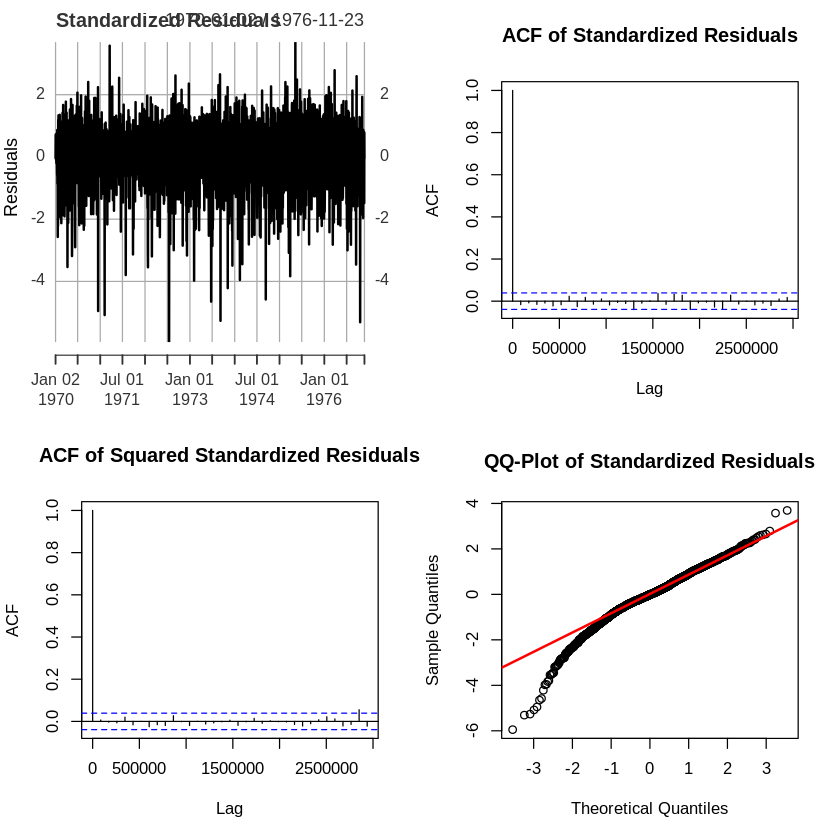

In [ ]:
# Assume that log_returns is an xts object of daily S&P500 log returns.
R_data <- as.numeric(log_returns)

### Full NAGARCH (NGARCH) Model: Leverage effect is estimated (theta free)
spec_nagarch_full <- ugarchspec(
  variance.model = list(model = "fGARCH", submodel = "NGARCH", garchOrder = c(1,1)),
  mean.model     = list(armaOrder = c(0,0), include.mean = TRUE),
  distribution.model = "norm"
)

fit_nagarch_full <- ugarchfit(spec = spec_nagarch_full, data = R_data, solver = "hybrid")
print(fit_nagarch_full)

### Restricted NAGARCH (NGARCH) Model: Leverage effect is restricted (theta fixed to 0)
spec_nagarch_restricted <- ugarchspec(
  variance.model = list(model = "fGARCH", submodel = "NGARCH", garchOrder = c(1,1)),
  mean.model     = list(armaOrder = c(0,0), include.mean = TRUE),
  distribution.model = "norm",
  fixed.pars = list(theta = 0)
)

fit_nagarch_restricted <- ugarchfit(spec = spec_nagarch_restricted, data = R_data, solver = "hybrid")
print(fit_nagarch_restricted)

### Likelihood Ratio Test for the Presence of Leverage Effect
# Extract log-likelihoods:
LL_full       <- fit_nagarch_full@fit$LLH
LL_restricted <- fit_nagarch_restricted@fit$LLH

LR_stat <- 2 * (LL_full - LL_restricted)
p_value <- 1 - pchisq(LR_stat, df = 1)

cat("Likelihood Ratio Test for Leverage Effect (theta free vs theta = 0):\n")
cat("LR Statistic =", LR_stat, "\n")
cat("p-value =", p_value, "\n")

### Diagnostics: Standardized Residuals and Plots
std_resid <- residuals(fit_nagarch_full, standardize = TRUE)

# Plot the standardized residuals, their ACF, the ACF of squared residuals, and a QQ-plot.
par(mfrow = c(2,2))
plot(std_resid, type = "l", main = "Standardized Residuals", ylab = "Residuals", xlab = "Time")
acf(std_resid, main = "ACF of Standardized Residuals")
acf(std_resid^2, main = "ACF of Squared Standardized Residuals")
qqnorm(std_resid, main = "QQ-Plot of Standardized Residuals")
qqline(std_resid, col = "red", lwd = 2)
par(mfrow = c(1,1))


### 2(d)

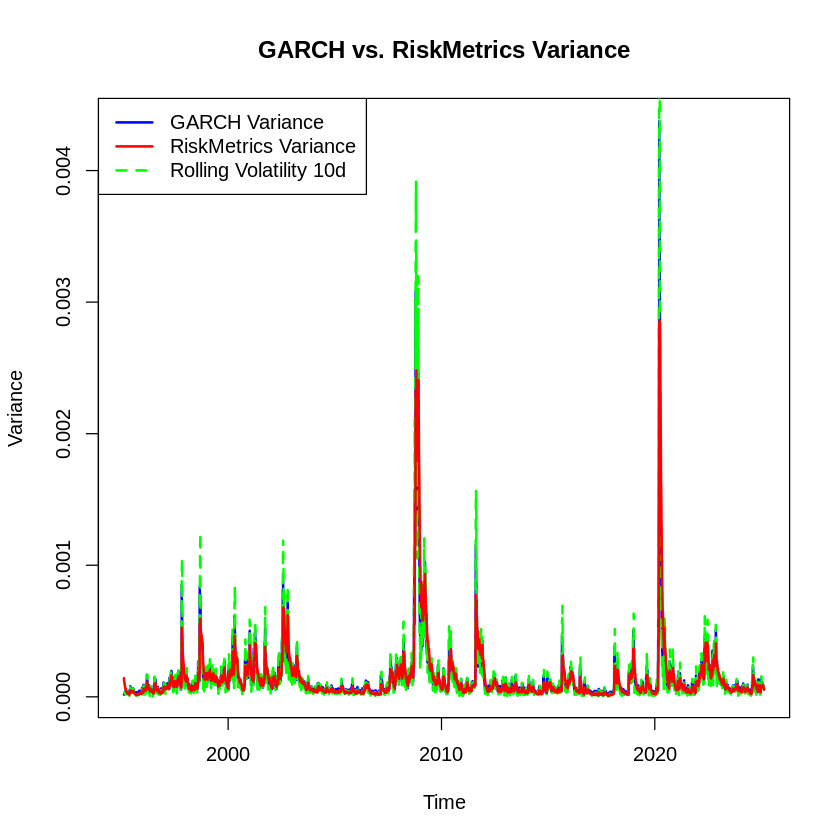

In [ ]:
##############################################################
## 2(d) Compare GARCH Variance with RiskMetrics Variance    ## riskmetrics WITH SQUARED RETURNS! GARCH HANDWRITTEN
##############################################################
# Compute RiskMetrics (EWMA) variance with lambda = 0.94
lambda <- 0.94
R_data <- log_returns
n_data <- length(R_data)
sigma2_RM <- numeric(n_data)
sigma2_RM[1] <- var(R_data)
for (t in 2:n_data) {
  sigma2_RM[t] <- lambda * sigma2_RM[t - 1] + (1 - lambda) * (R_data[t - 1])^2
}

window_size <- 10
roll_var <- rollapply(log_returns, width = window_size, FUN = var, align = "right", fill = NA)


# Plot the estimated GARCH variance against the RiskMetrics variance
plot(index(R_data), sigma2_full, type = "l", col = "blue", lwd = 2,
     ylab = "Variance", xlab = "Time", main = "GARCH vs. RiskMetrics Variance")
lines(index(R_data), as.numeric(roll_var), lty = "dashed", col = "green", lwd = 2)
lines(index(R_data), sigma2_RM, col = "red", lwd = 2)
legend("topleft", legend = c("GARCH Variance", "RiskMetrics Variance", "Rolling Volatility 10d"),
       col = c("blue", "red", "green"), lty = c(1, 1, 2), lwd = 2)


Correlation between GARCH variance and RiskMetrics variance: 0.9583679 


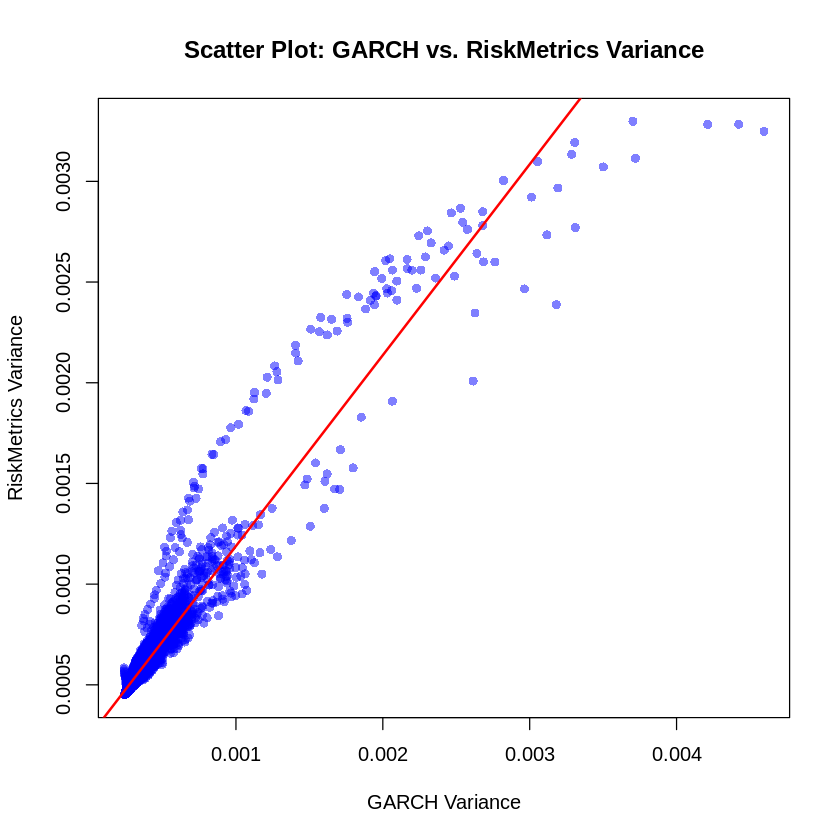


Regression of Realized Variance on GARCH Variance:

Call:
lm(formula = Realized ~ GARCH, data = comparison_matrix)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0038541 -0.0000825 -0.0000413  0.0000127  0.0134190 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.095e-04  8.824e-06  -23.75   <2e-16 ***
GARCH        9.700e-01  2.014e-02   48.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0004316 on 7550 degrees of freedom
Multiple R-squared:  0.2351,	Adjusted R-squared:  0.235 
F-statistic:  2320 on 1 and 7550 DF,  p-value: < 2.2e-16


Regression of Realized Variance on RiskMetrics Variance:

Call:
lm(formula = Realized ~ RiskMetrics, data = comparison_matrix)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0025522 -0.0000846 -0.0000410  0.0000113  0.0145281 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -

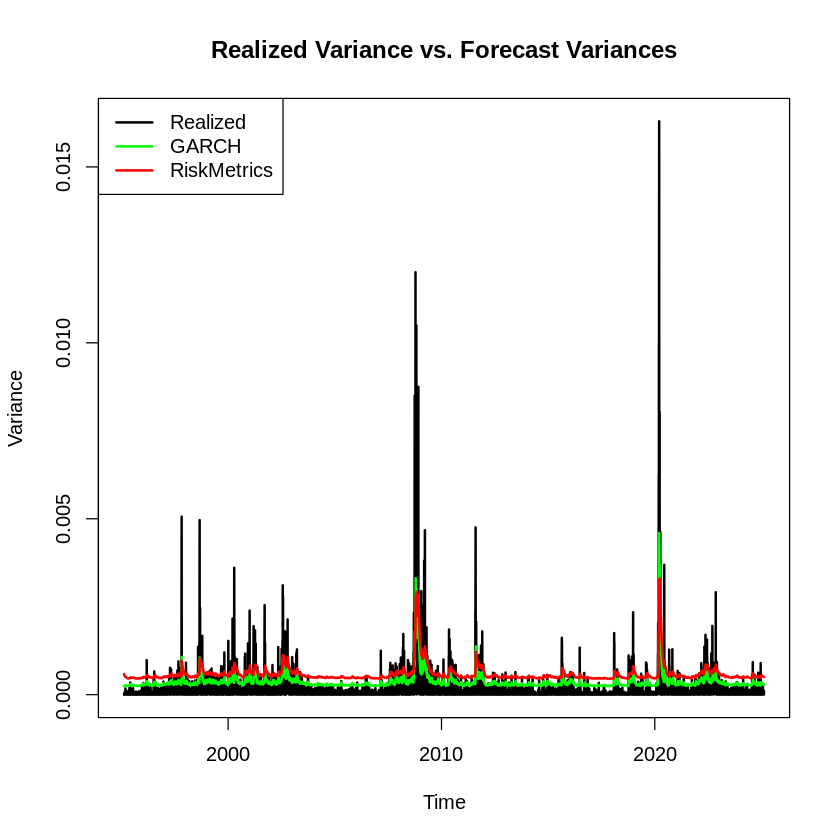

In [ ]:
# -----------------------------
# Additional Comparison Techniques
# -----------------------------

# (a) Compute the correlation between the two variance estimates
corr_garch_rm <- cor(as.numeric(sigma2_full), as.numeric(sigma2_RM), use = "complete.obs")
cat("Correlation between GARCH variance and RiskMetrics variance:", corr_garch_rm, "\n")

# (b) Scatter plot of GARCH vs. RiskMetrics variance with a fitted regression line
plot(as.numeric(sigma2_full), as.numeric(sigma2_RM),
     main = "Scatter Plot: GARCH vs. RiskMetrics Variance",
     xlab = "GARCH Variance", ylab = "RiskMetrics Variance",
     pch = 16, col = rgb(0, 0, 1, 0.5))
lm_fit <- lm(as.numeric(sigma2_RM) ~ as.numeric(sigma2_full))
abline(lm_fit, col = "red", lwd = 2)

# (c) Compare forecasting performance using realized variance proxy
# Here we use squared returns as a proxy for realized variance.
realized_var <- as.numeric(R_data^2)

# Merge all series into a single xts object
min_len <- min(length(sigma2_full), length(sigma2_RM), length(realized_var))

# Truncate the vectors to the minimum length
sigma2_full <- sigma2_full[1:min_len]
sigma2_RM <- sigma2_RM[1:min_len]
realized_var <- realized_var[1:min_len]

# Create the matrix
comparison_matrix <- cbind(sigma2_full, sigma2_RM, realized_var)
colnames(comparison_matrix) <- c("GARCH", "RiskMetrics", "Realized")
comparison_matrix <- as.data.frame(comparison_matrix)
dates <- index(log_returns)
min_len <- min(nrow(comparison_matrix), length(dates))
comparison_matrix <- comparison_matrix[1:min_len, ]
dates <- dates[1:min_len]
comparison_matrix$Date <- dates
comparison_matrix$Date <- as.Date(comparison_matrix$Date)
comparison_matrix_xts <- xts(comparison_matrix[, -4], order.by = comparison_matrix$Date)

# Plot the three series together
plot(comparison_matrix$Date, comparison_matrix$Realized,type = "l",  col = "black", lwd = 2,
     main = "Realized Variance vs. Forecast Variances",
     ylab = "Variance", xlab = "Time")
lines(comparison_matrix$Date, comparison_matrix$GARCH, col = "green", lwd = 2)
lines(comparison_matrix$Date, comparison_matrix$RiskMetrics, col = "red", lwd = 2)
legend("topleft", legend = c("Realized", "GARCH", "RiskMetrics"),
       col = c("black", "green", "red"), lwd = 2)

# Run regressions to compare forecasting performance
reg_garch <- lm(Realized ~ GARCH, data = comparison_matrix)
reg_rm    <- lm(Realized ~ RiskMetrics, data = comparison_matrix)
cat("\nRegression of Realized Variance on GARCH Variance:\n")
print(summary(reg_garch))
cat("\nRegression of Realized Variance on RiskMetrics Variance:\n")
print(summary(reg_rm))

In [ ]:
png("Garch_vs_riskmetrics.png", width = 1000, height = 600, res=100)
plot(comparison_matrix$Date, comparison_matrix$Realized,type = "l",  col = "black", lwd = 2,
    #  main = "Realized Variance vs. Forecast Variances",
     ylab = "Variance", xlab = "Time")
lines(comparison_matrix$Date, comparison_matrix$GARCH, col = "green", lwd = 2)
lines(comparison_matrix$Date, comparison_matrix$RiskMetrics, col = "red", lwd = 2)
legend("topleft", legend = c("Realized", "GARCH", "RiskMetrics"),
       col = c("black", "green", "red"), lwd = 2)
dev.off()

pdf 
  2

The correlation between the GARCH-implied variance and the RiskMetrics variance is very high (0.857), indicating that both models track similar volatility patterns. However, when regressing the realized variance on these forecasts, the GARCH model shows a slope of 1.089 $(p < 2\cdot 10^{-16})$ with an
$R^2= 0.312$, whereas the RiskMetrics model has a slope of 0.896 $(p < 2\cdot 10^{-16})$ and an $R^2= 0.189$.

This suggests that although RiskMetrics captures a significant portion of the volatility dynamics, the GARCH model better explains the variability in realized variance. In short, the GARCH model provides a superior volatility forecast relative to the RiskMetrics approach for S&P 500 returns.

# 3.

In [ ]:
start_date <- as.Date("2014-02-13")
end_date <- Sys.Date()
sp500_data <- getSymbols("^GSPC", src = "yahoo", from = start_date, to = end_date, auto.assign = FALSE)
log_returns     <- dailyReturn(Cl(sp500_data), type = "log")
log_returns     <- na.omit(log_returns)

Train the model on 10 years of data

In [ ]:
# --- PART 1: DATA SPLIT ---
n_total <- length(R_data)
n_out <- 251                   # Last 1 year (approx 251 trading days)
n_train <- n_total - n_out

R_train <- R_data[1:n_train]
R_test  <- R_data[(n_train + 1):n_total]

# --- PART 2: ESTIMATE GARCH MODEL ON TRAINING SAMPLE ---
# Using the same code as before, but now on R_train.
init_params_full <- c(mu = mean(R_train), omega = var(R_train), alpha = 0.15, beta = 0.05, theta = 0.1)
lower_bounds_full <- c(-1, 1e-8, 1e-8, 1e-8, -1)
upper_bounds_full <- c(1, 1, 1, 1, 2)

objective_full <- function(x) {
  loglik_garch(x, R_train, fix_theta = FALSE)
}

result_full_train <- nloptr(x0 = init_params_full,
                            eval_f = objective_full,
                            lb = lower_bounds_full,
                            ub = upper_bounds_full,
                            opts = list("algorithm" = "NLOPT_GN_CRS2_LM",
                                        "maxeval" = 10000,
                                        "print_level" = 0))
best_params <- result_full_train$solution
mu_hat    <- best_params[1]
omega_hat <- best_params[2]
alpha_hat <- best_params[3]
beta_hat  <- best_params[4]
theta_hat <- best_params[5]

# --- (Optional) Compute in-sample filtered variances for initialization ---
n_train_len <- length(R_train)
sigma2_garch_train <- numeric(n_train_len)
sigma2_garch_train[1] <- var(R_train)
for(t in 2:n_train_len) {
  sigma2_garch_train[t] <- omega_hat +
    alpha_hat * (R_train[t - 1] - theta_hat * sqrt(sigma2_garch_train[t - 1]))^2 +
    beta_hat * sigma2_garch_train[t - 1]
}
last_sigma2 <- sigma2_garch_train[n_train_len]  # last estimated variance from training

# --- PART 3: FORECASTING ON OUT-OF-SAMPLE DATA ---
# Forecast horizons: 1, 5, and 10 days.
n_test <- length(R_test)
# Pre-allocate forecast vectors for GARCH
forecast_GARCH_h1 <- rep(NA, n_test)
forecast_GARCH_h5 <- rep(NA, n_test)
forecast_GARCH_h10 <- rep(NA, n_test)
# Pre-allocate forecast vectors for RiskMetrics (RM)
forecast_RM_h1 <- rep(NA, n_test)
forecast_RM_h5 <- rep(NA, n_test)
forecast_RM_h10 <- rep(NA, n_test)

# For RiskMetrics we use lambda = 0.94 (commonly used for daily returns)
lambda <- 0.94
# For RM, we also initialize the variance using the training variance
sigma2_RM_current <- last_sigma2

# For the rolling forecasts, initialize the current GARCH variance
sigma2_GARCH_current <- last_sigma2
# And set the last observed return (from training) for the first update:
R_last <- R_train[n_train_len]

# Loop over the out-of-sample period:
for(i in 1:n_test) {
  ## --- GARCH Forecasts ---
  # 1-step forecast:
  sigma2_1 <- omega_hat +
    alpha_hat * (R_last - theta_hat * sqrt(sigma2_GARCH_current))^2 +
    beta_hat * sigma2_GARCH_current
  forecast_GARCH_h1[i] <- sigma2_1

  # 5-step forecast: start with the 1-step forecast and iterate
  sigma2_temp <- sigma2_1
  for(h in 2:5) {
    sigma2_temp <- omega_hat + (alpha_hat * (1 + theta_hat^2) + beta_hat) * sigma2_temp
  }
  forecast_GARCH_h5[i] <- sigma2_temp

  # 10-step forecast:
  sigma2_temp <- sigma2_1
  for(h in 2:10) {
    sigma2_temp <- omega_hat + (alpha_hat * (1 + theta_hat^2) + beta_hat) * sigma2_temp
  }
  forecast_GARCH_h10[i] <- sigma2_temp

  ## --- RiskMetrics Forecasts ---
  # 1-step RM forecast using the EWMA update:
  sigma2_RM_1 <- lambda * sigma2_RM_current + (1 - lambda) * (R_last)^2
  forecast_RM_h1[i] <- sigma2_RM_1
  # For multi-step RM forecasts, we can use the analytical formula:
  # Note: sigma_RM_uncond is approximated by the training sample average of squared returns.
  sigma_RM_uncond <- mean(R_train^2)
  forecast_RM_h5[i]  <- lambda^5 * sigma2_RM_current + (1 - lambda^5) * sigma_RM_uncond
  forecast_RM_h10[i] <- lambda^10 * sigma2_RM_current + (1 - lambda^10) * sigma_RM_uncond

  ## --- Update for next iteration ---
  # Update the GARCH variance using the observed return:
  sigma2_GARCH_current <- omega_hat +
    alpha_hat * (R_test[i] - theta_hat * sqrt(sigma2_GARCH_current))^2 +
    beta_hat * sigma2_GARCH_current
  # Update RM variance:
  sigma2_RM_current <- lambda * sigma2_RM_current + (1 - lambda) * (R_test[i])^2
  # Update the last return:
  R_last <- R_test[i]
}

# --- PART 4: FORECAST DIAGNOSTICS ---
# For h=1, the realized variance is simply the squared return.
realized_var_h1 <- R_test^2
# For multi-day horizons, we approximate the realized variance as the sum of squared returns over h days.
realized_var_h5 <- sapply(1:(n_test - 5 + 1), function(i) sum(R_test[i:(i+5-1)]^2))
realized_var_h10 <- sapply(1:(n_test - 10 + 1), function(i) sum(R_test[i:(i+10-1)]^2))

# Trim forecast vectors accordingly:
eval_idx_h1 <- 1:length(realized_var_h1)
eval_idx_h5 <- 1:length(realized_var_h5)
eval_idx_h10 <- 1:length(realized_var_h10)

GARCH_h1_forecast <- mu_hat^2 + forecast_GARCH_h1[eval_idx_h1]
GARCH_h5_forecast <- mu_hat^2 + forecast_GARCH_h5[eval_idx_h5]
GARCH_h10_forecast <- mu_hat^2 + forecast_GARCH_h10[eval_idx_h10]

RM_h1_forecast <- forecast_RM_h1[eval_idx_h1]
RM_h5_forecast <- forecast_RM_h5[eval_idx_h5]
RM_h10_forecast <- forecast_RM_h10[eval_idx_h10]

# Compute Mean Squared Errors (MSE) for each horizon and model:
mse_GARCH_h1 <- mean((realized_var_h1 - GARCH_h1_forecast)^2)
mse_GARCH_h5 <- mean((realized_var_h5 - GARCH_h5_forecast)^2)
mse_GARCH_h10 <- mean((realized_var_h10 - GARCH_h10_forecast)^2)

mse_RM_h1 <- mean((realized_var_h1 - RM_h1_forecast)^2)
mse_RM_h5 <- mean((realized_var_h5 - RM_h5_forecast)^2)
mse_RM_h10 <- mean((realized_var_h10 - RM_h10_forecast)^2)

cat("MSE GARCH h=1:", mse_GARCH_h1, "\n")
cat("MSE RiskMetrics h=1:", mse_RM_h1, "\n")
cat("MSE GARCH h=5:", mse_GARCH_h5, "\n")
cat("MSE RiskMetrics h=5:", mse_RM_h5, "\n")
cat("MSE GARCH h=10:", mse_GARCH_h10, "\n")
cat("MSE RiskMetrics h=10:", mse_RM_h10, "\n")

# --- Formal Testing: Diebold-Mariano Test ---
# Install and load the 'forecast' package if not already installed:
if(!require(forecast)) install.packages("forecast")
library(forecast)

# For h=1:
e_GARCH_h1 <- realized_var_h1 - GARCH_h1_forecast
e_RM_h1    <- realized_var_h1 - RM_h1_forecast
dm_test_h1 <- dm.test(e_GARCH_h1, e_RM_h1, alternative = "two.sided", h = 1, power = 2)

# For h=5:
e_GARCH_h5 <- realized_var_h5 - GARCH_h5_forecast
e_RM_h5    <- realized_var_h5 - RM_h5_forecast
dm_test_h5 <- dm.test(e_GARCH_h5, e_RM_h5, alternative = "two.sided", h = 5, power = 2)

# For h=10:
e_GARCH_h10 <- realized_var_h10 - GARCH_h10_forecast
e_RM_h10    <- realized_var_h10 - RM_h10_forecast
dm_test_h10 <- dm.test(e_GARCH_h10, e_RM_h10, alternative = "two.sided", h = 10, power = 2)

cat("\nDiebold-Mariano test results:\n")
print(dm_test_h1)
print(dm_test_h5)
print(dm_test_h10)


MSE GARCH h=1: 1.700416e-08 
MSE RiskMetrics h=1: 1.479593e-08 
MSE GARCH h=5: 1.41905e-07 
MSE RiskMetrics h=5: 1.557596e-07 
MSE GARCH h=10: 5.360802e-07 
MSE RiskMetrics h=10: 5.747524e-07 

Diebold-Mariano test results:

	Diebold-Mariano Test

data:  e_GARCH_h1e_RM_h1
DM = 0.82886, Forecast horizon = 1, Loss function power = 2, p-value =
0.408
alternative hypothesis: two.sided


	Diebold-Mariano Test

data:  e_GARCH_h5e_RM_h5
DM = -1.3318, Forecast horizon = 5, Loss function power = 2, p-value =
0.1841
alternative hypothesis: two.sided


	Diebold-Mariano Test

data:  e_GARCH_h10e_RM_h10
DM = -1.3101, Forecast horizon = 10, Loss function power = 2, p-value =
0.1914
alternative hypothesis: two.sided



The Diebold–Mariano (DM) test is used to assess whether the difference in forecasting performance (measured here by the squared error loss) between two models is statistically significant. In your case, the null hypothesis is that both the GARCH and RiskMetrics forecasts have equal predictive accuracy.

Horizon 1 (DM = 0.82886, p-value = 0.408):
The positive DM statistic suggests that if anything, the GARCH model may have slightly lower forecast errors than RiskMetrics, but the p-value of 0.408 is well above any common significance level (e.g., 5% or 10%). This means we do not reject the null hypothesis; there is no statistically significant difference in the one-step forecast accuracy of the two models.

Horizon 5 (DM = -1.3318, p-value = 0.1841):
Here, the DM statistic is negative, which would indicate that the RiskMetrics model may have lower errors than the GARCH model. However, the p-value of 0.1841 is still not low enough to reject the null hypothesis. Therefore, we conclude that for a 5-day horizon, there is no significant difference in forecast performance between the models.

Horizon 10 (DM = -1.3101, p-value = 0.1914):
Similarly, for the 10-day horizon, the negative DM statistic suggests a potential edge for the RiskMetrics model, but again the p-value of 0.1914 does not provide enough evidence to reject the null hypothesis.

Overall Implication:
For all three forecast horizons (1, 5, and 10 days), the tests indicate that there is no statistically significant difference in forecasting accuracy between the GARCH model and the RiskMetrics model when using the squared error loss. In practical terms, neither model outperforms the other in a statistically meaningful way based on your sample and the chosen loss function.

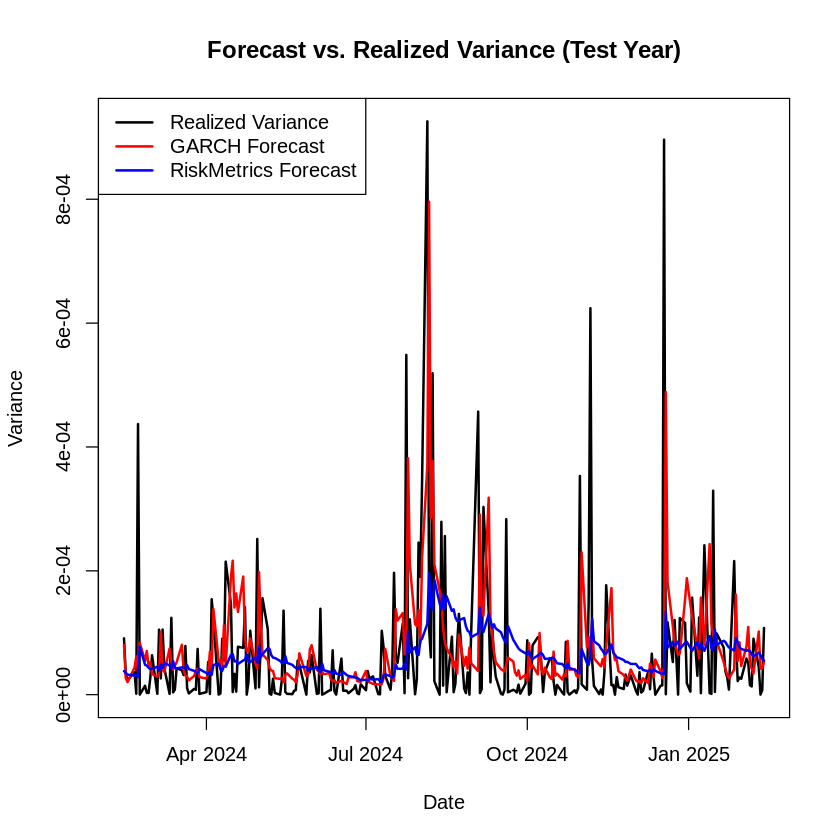

In [ ]:
# ---- Extract Test Dates --------------------------------------------
# Assume that the full sample 'log_returns' is an xts object.
n_total <- length(R_data)        # Total number of observations
n_out   <- 251                   # Last 1 year (approximately 251 trading days)
n_train <- n_total - n_out

# Extract the dates corresponding to the test period:
test_dates <- index(log_returns)[(n_train + 1):n_total]

# ---- Compute Realized Variance -------------------------------------
# For daily (h=1) forecast, realized variance is just the squared return.
realized_variance <- R_test^2

# ---- Base R Plot ---------------------------------------------------
plot(test_dates, realized_variance, type = "l", col = "black", lwd = 2,
     xlab = "Date", ylab = "Variance",
     main = "Forecast vs. Realized Variance (Test Year)")
lines(test_dates, forecast_GARCH_h1, col = "red", lwd = 2)
lines(test_dates, forecast_RM_h1, col = "blue", lwd = 2)
legend("topleft", legend = c("Realized Variance", "GARCH Forecast", "RiskMetrics Forecast"),
       col = c("black", "red", "blue"), lwd = 2)


In [ ]:
png(as.character("Forecast_pred.png"), width = 1000, height = 600, res=100)
plot(test_dates, realized_variance, type = "l", col = "black", lwd = 2,
     xlab = "Date", ylab = "Variance",
     main = "Forecast vs. Realized Variance (Test Year)")
lines(test_dates, forecast_GARCH_h1, col = "red", lwd = 2)
lines(test_dates, forecast_RM_h1, col = "blue", lwd = 2)
legend("topleft", legend = c("Realized Variance", "GARCH Forecast", "RiskMetrics Forecast"),
       col = c("black", "red", "blue"), lwd = 2)
dev.off()

pdf 
  2

##### Old COde

In [ ]:
# --- Required functions ---

# Your compute_sigma2 function (assumed defined)
compute_sigma2 <- function(R, params, fix_theta = FALSE) {
  n <- length(R)
  if (fix_theta) {
    mu    <- params[1]
    omega <- params[2]
    alpha <- params[3]
    beta  <- params[4]
    theta <- 0
  } else {
    mu    <- params[1]
    omega <- params[2]
    alpha <- params[3]
    beta  <- params[4]
    theta <- params[5]
  }
  sigma2 <- numeric(n)
  denom <- 1 - (beta - alpha * theta)
  if (denom <= 0) {
    sigma2[1] <- var(R)
  } else {
    sigma2[1] <- omega / denom
  }
  if (!is.finite(sigma2[1]) || sigma2[1] <= 0) sigma2[1] <- 1e-8
  for (t in 2:n) {
    sigma2[t] <- omega + alpha * (R[t - 1] - theta * sqrt(sigma2[t - 1]))^2 + beta * sigma2[t - 1]
    if (!is.finite(sigma2[t]) || sigma2[t] < 1e-8) sigma2[t] <- 1e-8
  }
  return(sigma2)
}

# Recursive forecasting function for your GARCH model.
forecast_garch <- function(h, params, last_R, last_sigma2) {
  # Extract parameters
  mu    <- params[1]
  omega <- params[2]
  alpha <- params[3]
  beta  <- params[4]
  theta <- params[5]

  fc <- numeric(h)
  # 1-step forecast: use last observed return and variance.
  fc[1] <- omega + alpha * (last_R - theta * sqrt(last_sigma2))^2 + beta * last_sigma2
  if (h > 1) {
    for (i in 2:h) {
      # For future steps, assume expected return equals mu.
      fc[i] <- omega + alpha * (mu - theta * sqrt(fc[i-1]))^2 + beta * fc[i-1]
    }
  }
  return(fc)
}

# RiskMetrics forecast function (EWMA)
forecast_riskmetrics <- function(h, sigma_last, lr_var, lambda = 0.94) {
  # h-step forecast: sigma^2 forecast = lambda^h * sigma_last + (1-lambda^h)*lr_var
  lambda^h * sigma_last + (1 - lambda^h) * lr_var
}

# --- Data Setup ---
# Assume log_returns is your xts object of daily S&P500 log returns.
R_data <- as.numeric(log_returns)
N <- length(R_data)

# Define out-of-sample period: here, the last 3 years of data.
out_sample_length <- 251*3
start_index <- N - out_sample_length + 1

# For RiskMetrics, we use lambda = 0.94 and define long-run variance as the overall sample variance.
lambda <- 0.94
lr_var <- var(R_data)

# Forecast horizons (in days)
horizons <- c(1, 5, 10)

# Pre-allocate matrices to store forecasts for each forecast origin in the out-of-sample period.
n_forecasts <- out_sample_length - max(horizons) + 1  # ensure enough data for the longest horizon
garch_fc_mat <- matrix(NA, nrow = n_forecasts, ncol = length(horizons))
colnames(garch_fc_mat) <- paste0("h=", horizons)

riskmetrics_fc_mat <- matrix(NA, nrow = n_forecasts, ncol = length(horizons))
colnames(riskmetrics_fc_mat) <- paste0("h=", horizons)

realized_var_mat <- matrix(NA, nrow = n_forecasts, ncol = length(horizons))
colnames(realized_var_mat) <- paste0("h=", horizons)

# --- Rolling Forecast Loop ---
for (t in start_index:(N - max(horizons))) {
  # Define the in-sample period for this forecast origin.
  R_insample <- R_data[1:t]
  sigma2_insample <- compute_sigma2(R_insample, best_params_full, fix_theta = FALSE)
  last_R <- R_insample[t]
  last_sigma2 <- tail(sigma2_insample, 1)

  # Generate multi-step forecasts for the GARCH model.
  fc <- forecast_garch(h = max(horizons), params = best_params_full, last_R = last_R, last_sigma2 = last_sigma2)

  # For each horizon, store the h-step forecast.
  for (h in horizons) {
    garch_fc_mat[t - start_index + 1, paste0("h=", h)] <- fc[h]
    # RiskMetrics forecast:
    riskmetrics_fc_mat[t - start_index + 1, paste0("h=", h)] <- forecast_riskmetrics(h, last_sigma2, lr_var, lambda)

    # Realized variance: sum of squared returns over the forecast horizon, using actual out-of-sample data.
    realized_var_mat[t - start_index + 1, paste0("h=", h)] <- sum(R_data[(t+1):(t+h)]^2)
  }
}

# Average the forecasts over the out-of-sample period:
avg_garch_fc <- colMeans(garch_fc_mat, na.rm = TRUE)
avg_riskmetrics_fc <- colMeans(riskmetrics_fc_mat, na.rm = TRUE)
avg_realized_var <- colMeans(realized_var_mat, na.rm = TRUE)

# Create and print a comparison table:
comparison_table <- data.frame(
  Horizon = horizons,
  GARCH_Forecast = round(avg_garch_fc, 6),
  RiskMetrics_Forecast = round(avg_riskmetrics_fc, 6),
  Realized_Variance = round(avg_realized_var, 6)
)
cat("Comparison of Average Variance Forecasts over the Out-of-Sample Period:\n")
print(comparison_table)

Comparison of Average Variance Forecasts over the Out-of-Sample Period:
     Horizon GARCH_Forecast RiskMetrics_Forecast Realized_Variance
h=1        1       0.000129             0.000130          0.000119
h=5        5       0.000091             0.000133          0.000594
h=10      10       0.000063             0.000135          0.001183


In [ ]:
# Assume log_returns is your daily S&P500 log returns (e.g. an xts object)
R_data <- as.numeric(log_returns)
n_total <- length(R_data)

# Define forecast horizons (in days)
horizons <- c(1, 5, 10)

# Define the out-of-sample forecast period: last 2510 trading days (approx. 10 years)
n_out <- 2510
in_sample_end <- n_total - n_out  # last in-sample observation index

# Helper function to produce multi-step variance forecasts using your model.
forecast_model <- function(h, mu, omega, alpha, beta, theta, last_R, last_sigma2) {
  sigma_fc <- numeric(h)
  # one-step forecast: use the last observed R and sigma2
  sigma_fc[1] <- omega + alpha * (last_R - theta * sqrt(last_sigma2))^2 + beta * last_sigma2
  if (h > 1) {
    for (i in 2:h) {
      # For subsequent steps, assume the expected return equals mu
      sigma_fc[i] <- omega + alpha * (mu - theta * sqrt(sigma_fc[i - 1]))^2 + beta * sigma_fc[i - 1]
    }
  }
  return(sigma_fc)
}

# Helper function for RiskMetrics forecast using EWMA:
riskmetrics_forecast <- function(h, sigma_last, lr_var, lambda) {
  return(lambda^h * sigma_last + (1 - lambda^h) * lr_var)
}

# Set RiskMetrics decay factor:
lambda <- 0.94

# We'll perform rolling forecasts starting at t = in_sample_end up to t = (n_total - max(horizons) + 1)
n_forecasts <- n_total - in_sample_end - max(horizons) + 1

# Pre-allocate a matrix to store forecasts.
# For each forecast origin, we store the h-step forecast for the GARCH model and for RiskMetrics.
# Columns: GARCH_h1, GARCH_h5, GARCH_h10, RM_h1, RM_h5, RM_h10.
forecast_results <- matrix(NA, nrow = n_forecasts, ncol = length(horizons)*2)
colnames(forecast_results) <- c("GARCH_h1", "GARCH_h5", "GARCH_h10", "RM_h1", "RM_h5", "RM_h10")

# Loop over forecast origins:
for (t in in_sample_end:(n_total - max(horizons) + 1)) {
  # Use data up to time t as the in-sample window:
  R_temp <- R_data[1:t]
  # Compute the conditional variance series using your model and best_params_full:
  sigma2_temp <- compute_sigma2(R_temp, best_params_full, fix_theta = FALSE)
  sigma_last <- tail(sigma2_temp, 1)
  last_R <- R_temp[t]
  # Compute the long-run variance from the current in-sample window:
  lr_var <- var(R_temp)

  # Obtain multi-step forecasts from the GARCH model:
  garch_fc <- forecast_model(horizons, best_params_full[1], best_params_full[2],
                             best_params_full[3], best_params_full[4],
                             best_params_full[5], last_R, sigma_last)

  # Obtain RiskMetrics forecasts:
  rm_fc <- sapply(horizons, function(h) riskmetrics_forecast(h, sigma_last, lr_var, lambda))

  idx <- t - in_sample_end + 1
  forecast_results[idx, 1:3] <- garch_fc
  forecast_results[idx, 4:6] <- rm_fc
}

# # Average the forecasts over all rolling forecast origins:
# avg_forecasts <- colMeans(forecast_results, na.rm = TRUE)

# # Create a comparison table:
# comparison_table <- data.frame(
#   Horizon = horizons,
#   GARCH_Forecast = round(avg_forecasts[1:3], 6),
#   RiskMetrics_Forecast = round(avg_forecasts[4:6], 6)
# )

# cat("Average Forecasts over the Rolling Out-of-Sample Period:\n")
# print(comparison_table)


ERROR: Error in numeric(h): invalid 'length' argument


In [ ]:
# Assume that log_returns is your full series (e.g., an xts object) of daily S&P500 log returns.
R_data <- as.numeric(log_returns)

# Compute the in-sample conditional variances using your compute_sigma2 function.
sigma2_all <- compute_sigma2(R_data, best_params_full, fix_theta = FALSE)
last_sigma2 <- tail(sigma2_all, 1)
last_R <- tail(R_data, 1)

# Forecast horizons (in days)
horizons <- c(1, 5, 10)

# Define a function to produce multi-step variance forecasts using your model:
forecast_model <- function(h, mu, omega, alpha, beta, theta, last_R, last_sigma2) {
  sigma_forecast <- numeric(h)
  # one-step forecast: use the last observed return:
  sigma_forecast[1] <- omega + alpha * (last_R - theta * sqrt(last_sigma2))^2 + beta * last_sigma2
  # for h > 1, assume that the expected return equals mu.
  if(h > 1){
    for(i in 2:h){
      sigma_forecast[i] <- omega + alpha * (mu - theta * sqrt(sigma_forecast[i-1]))^2 + beta * sigma_forecast[i-1]
    }
  }
  return(sigma_forecast)
}

############################
############################

# Compute model forecasts for each horizon (we take the forecasted variance at the final step)
model_forecasts <- sapply(horizons, function(h) {
  fc <- forecast_model(h, best_params_full[1], best_params_full[2],
                         best_params_full[3], best_params_full[4], best_params_full[5],
                         last_R, last_sigma2)
  return(fc[h])  # take the h-step forecast
})
names(model_forecasts) <- paste0("h=", horizons)

# RiskMetrics forecasts
lambda <- 0.94
lr_var <- var(R_data) # Define long-run variance as the sample variance:
riskmetrics_forecast <- function(h, sigma_last, lr_var, lambda) {
  return(lambda^h * sigma_last + (1 - lambda^h) * lr_var)
}
riskmetrics_forecasts <- sapply(horizons, function(h) {
  riskmetrics_forecast(h, last_sigma2, lr_var, lambda)
})
names(riskmetrics_forecasts) <- paste0("h=", horizons)

In [ ]:
# Assume that the forecast period is defined as the last M observations of R_data.
# For demonstration, let M = max(horizons). In practice, you would use a rolling scheme.
M <- max(horizons)
# Here we assume that R_data contains both in-sample and forecast data.
# For example, let the forecast origin be at index (N - M + 1)
N <- length(R_data)
forecast_returns <- R_data[(N - M + 1):N]
# For each horizon, compute realized variance as the sum of squared returns over the horizon.
realized_variance <- sapply(horizons, function(h) {
  sum(forecast_returns[1:h]^2)
})
names(realized_variance) <- paste0("h=", horizons)

# Print a comparison table:
comparison_table <- data.frame(
  Horizon = horizons,
  ModelForecast = round(model_forecasts, 6),
  RiskMetricsForecast = round(riskmetrics_forecasts, 6),
  RealizedVariance = round(realized_variance, 6)
)
print("Comparison of Forecast Variances:")
print(comparison_table)

# (Optional) Plot the forecasts vs. realized variance:
library(ggplot2)
df_plot <- data.frame(
  Horizon = rep(horizons, 3),
  Forecast = c(model_forecasts, riskmetrics_forecasts, realized_variance),
  Method = rep(c("GARCH Model", "RiskMetrics", "Realized"), each = length(horizons))
)
ggplot(df_plot, aes(x = Horizon, y = Forecast, color = Method, group = Method)) +
  geom_line(size = 1.2) +
  geom_point(size = 3) +
  labs(title = "Forecast Comparison at Different Horizons",
       y = "Variance Forecast",
       x = "Horizon (days)") +
  theme_minimal()


In [ ]:
# (5) Plot the Forecast Errors (Optional)

# Save the plot
png(as.character("forecast_errors_5.png"), width = 1500, height = 900, res=130)
par(mfrow = c(1, length(forecast_horizons)))
hist(errors_GARCH[[as.character(5)]],
      main = paste("GARCH Forecast Errors\nHorizon =", 5, "days"),
      xlab = "Forecast Error", col = "lightblue", breaks = 20)
hist(errors_RM[[as.character(5)]],
      main = paste("RiskMetrics Forecast Errors\nHorizon =", 5, "days"),
      xlab = "Forecast Error", col = "lightpink", breaks = 20)
dev.off()

# to see the same graph on the screen
par(mfrow = c(1, length(forecast_horizons)))
hist(errors_GARCH[[as.character(5)]],
      main = paste("GARCH Forecast Errors\nHorizon =", 5, "days"),
      xlab = "Forecast Error", col = "lightblue", breaks = 20)
hist(errors_RM[[as.character(5)]],
      main = paste("RiskMetrics Forecast Errors\nHorizon =", 5, "days"),
      xlab = "Forecast Error", col = "lightpink", breaks = 20)

pdf 
  2

In [ ]:
png(as.character("forecast_errors_1.png"), width = 1500, height = 900, res=130)
par(mfrow = c(2, 2))
hist(errors_GARCH[[as.character(1)]],
      main = paste("GARCH Forecast Errors\nHorizon =", 1, "days"),
      xlab = "Forecast Error", col = "lightblue", breaks = 20)
hist(errors_RM[[as.character(1)]],
      main = paste("RiskMetrics Forecast Errors\nHorizon =", 1, "days"),
      xlab = "Forecast Error", col = "lightpink", breaks = 20)
dev.off()

# to see the same graph on the screen
par(mfrow = c(2, 2))
hist(errors_GARCH[[as.character(1)]],
      main = paste("GARCH Forecast Errors\nHorizon =", 1, "days"),
      xlab = "Forecast Error", col = "lightblue", breaks = 20)
hist(errors_RM[[as.character(1)]],
      main = paste("RiskMetrics Forecast Errors\nHorizon =", 1, "days"),
      xlab = "Forecast Error", col = "lightpink", breaks = 20)

pdf 
  2

In [ ]:
png(as.character("forecast_errors_1.png"), width = 1500, height = 1000, res=130)
par(mfrow = c(1, 2))
hist(errors_GARCH[[as.character(1)]],
      main = paste("GARCH Forecast Errors\nHorizon =", 1, "days"),
      xlab = "Forecast Error", col = "lightblue", breaks = 20)
hist(errors_RM[[as.character(1)]],
      main = paste("RiskMetrics Forecast Errors\nHorizon =", 1, "days"),
      xlab = "Forecast Error", col = "lightpink", breaks = 20)
dev.off()

# to see the same graph on the screen
par(mfrow = c(1, 2))
hist(errors_GARCH[[as.character(1)]],
      main = paste("GARCH Forecast Errors\nHorizon =", 1, "days"),
      xlab = "Forecast Error", col = "lightblue", breaks = 20)
hist(errors_RM[[as.character(1)]],
      main = paste("RiskMetrics Forecast Errors\nHorizon =", 1, "days"),
      xlab = "Forecast Error", col = "lightpink", breaks = 20)

pdf 
  2

# 4

In [ ]:
# # install.packages("fitdistrplus")
# install.packages("PerformanceAnalytics")
# # library(fitdistrplus)
# library(PerformanceAnalytics)

In [ ]:
if (!require(xtable)) install.packages("xtable", dependencies = TRUE)
library(xtable)

THeoretical VaR:

$$
-VaR^{(\alpha)}_t=\mu+\sigma_tF^{-1}(\alpha)
$$

In [ ]:
compute_sigma2 <- function(R, params, fix_theta = FALSE) {
  n <- length(R)
  if (fix_theta) {
    mu    <- params[1]
    omega <- params[2]
    alpha <- params[3]
    beta  <- params[4]
    theta <- 0
  } else {
    mu    <- params[1]
    omega <- params[2]
    alpha <- params[3]
    beta  <- params[4]
    theta <- params[5]
  }
  sigma2 <- numeric(n)
  denom <- 1 - (beta - alpha * theta)
  if (denom <= 0) {sigma2[1] <- var(R)} else {sigma2[1] <- omega / denom}
  if (!is.finite(sigma2[1]) || sigma2[1] <= 0) sigma2[1] <- 1e-8
  for (t in 2:n) {
    sigma2[t] <- omega + alpha * (R[t - 1] - theta * sqrt(sigma2[t - 1]))^2 + beta * sigma2[t - 1]
    if (!is.finite(sigma2[t]) || sigma2[t] < 1e-8) sigma2[t] <- 1e-8}
  return(sigma2)
}

#--------------------------------------------------
# 1. Compute the 5% Conditional VaR for each model
#--------------------------------------------------

alpha_level <- 0.05
q_alpha     <- qnorm(alpha_level)  # ~ -1.644854

# (a) GARCH model with leverage.
# Assume best_params is the estimated parameter vector: (mu, omega, alpha, beta, theta)
sigma2_with <- compute_sigma2(as.numeric(log_returns), best_params_full, fix_theta = FALSE)
VaR_with    <- best_params_full[1] + sqrt(sigma2_with) * q_alpha

# (b) GARCH model without leverage.
# Assume result_no_leverage$par is the estimated parameter vector: (mu, omega, alpha, beta) (with theta=0)
sigma2_nolev <- compute_sigma2(as.numeric(log_returns), best_params_restricted, fix_theta = TRUE)
VaR_nolev    <- best_params_restricted[1] + sqrt(sigma2_nolev) * q_alpha

# (c) i.i.d. Normal model.
mu_iid    <- mean(as.numeric(log_returns))
sigma_iid <- sd(as.numeric(log_returns))
VaR_iid   <- rep(mu_iid + sigma_iid * q_alpha, length(log_returns))  # constant VaR

# Compute the violation indicators for each model:
viol_with   <- as.numeric(as.numeric(log_returns) < VaR_with)
viol_nolev  <- as.numeric(as.numeric(log_returns) < VaR_nolev)
viol_iid    <- as.numeric(as.numeric(log_returns) < VaR_iid)

In [ ]:
alpha_level

[1] 0.05

In [ ]:
png("VaR.png", width = 1000, height = 600, res=100)
plot(VaR_with, type = "l", col = "blue", lwd = 2, ylab = "-VaR", xlab = "Time")
lines(VaR_nolev, col="red", lwd = 2)
lines(VaR_iid, col="green", lwd = 2)

legend("bottomleft", legend = c("GARCH (w/ leverage) VaR(a)", "GARCH (w/o leverage) VaR(a)", "i.i.d. VaR(a)"),
       col = c("blue", "red", "green"), lty = c(1, 1, 1), lwd = 2)
dev.off()

pdf 
  2

In [ ]:
#############################################
## Test 1: Unconditional Coverage Test
#############################################
# For a series H_t that are Bernoulli, under the null, the violation probability is fixed at alpha.
# Thus the null log-likelihood is:
LL_null <- function(viol, alpha_level) {
  sum(viol*log(alpha_level) + (1-viol)*log(1-alpha_level))
}
# Under the alternative, we estimate the probability as p_hat = mean(H_t)
LL_alt <- function(viol) {
  p_hat <- mean(viol)
  sum(viol*log(p_hat) + (1-viol)*log(1-p_hat))
}
# LR test function:
test_unconditional <- function(viol, alpha_level) {
  L0 <- LL_null(viol, alpha_level)
  L1 <- LL_alt(viol)
  LR_stat <- 2 * (L1 - L0)
  p_value <- 1 - pchisq(LR_stat, df = 1)
  list(p_hat = mean(viol), L0 = L0, L1 = L1, LR_stat = LR_stat, p_value = p_value)
}

cat("----- Test 1: Unconditional Coverage (Bernoulli) -----\n")
cat("\nGARCH with leverage:\n")
res1_with <- test_unconditional(viol_with, alpha_level)
print(res1_with)

cat("\nGARCH without leverage:\n")
res1_nolev <- test_unconditional(viol_nolev, alpha_level)
print(res1_nolev)

cat("\ni.i.d. Normal model:\n")
res1_iid <- test_unconditional(viol_iid, alpha_level)
print(res1_iid)

----- Test 1: Unconditional Coverage (Bernoulli) -----

GARCH with leverage:
$p_hat
[1] 0.05641637

$L0
[1] -1641.647

$L1
[1] -1638.499

$LR_stat
[1] 6.295332

$p_value
[1] 0.01210563


GARCH without leverage:
$p_hat
[1] 0.05376771

$L0
[1] -1582.758

$L1
[1] -1581.655

$LR_stat
[1] 2.204904

$p_value
[1] 0.1375725


i.i.d. Normal model:
$p_hat
[1] 0.04396769

$L0
[1] -1364.869

$L1
[1] -1361.86

$LR_stat
[1] 6.019444

$p_value
[1] 0.0141491



In [ ]:
df_test1 <- data.frame(
  Model = c("GARCH with Leverage", "GARCH without Leverage", "i.i.d. Normal"),
  Violation_Rate = c(res1_with$p_hat, res1_nolev$p_hat, res1_iid$p_hat),
  LogLik_Null = c(res1_with$L0, res1_nolev$L0, res1_iid$L0),
  LogLik_Alt  = c(res1_with$L1, res1_nolev$L1, res1_iid$L1),
  LR_Statistic = c(res1_with$LR_stat, res1_nolev$LR_stat, res1_iid$LR_stat),
  p_value = c(res1_with$p_value, res1_nolev$p_value, res1_iid$p_value)
)

# Convert the data frame to a LaTeX table:
latex_test1 <- xtable(df_test1,
                      caption = "Unconditional Coverage Test (Kupiec Test): Comparison of the log-likelihood under the null hypothesis (violation probability = 5\\%) and the alternative hypothesis (violation probability estimated from data).",
                      label = "tab:uncond_coverage")
# Print the table (set include.rownames = FALSE to omit row numbers)
print(latex_test1, type = "latex", include.rownames = FALSE)

% latex table generated in R 4.4.2 by xtable 1.8-4 package
% Thu Feb 13 21:20:47 2025
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrr}
  \hline
Model & Violation\_Rate & LogLik\_Null & LogLik\_Alt & LR\_Statistic & p\_value \\ 
  \hline
GARCH with Leverage & 0.06 & -1641.65 & -1638.50 & 6.30 & 0.01 \\ 
  GARCH without Leverage & 0.05 & -1582.76 & -1581.66 & 2.20 & 0.14 \\ 
  i.i.d. Normal & 0.04 & -1364.87 & -1361.86 & 6.02 & 0.01 \\ 
   \hline
\end{tabular}
\caption{Unconditional Coverage Test (Kupiec Test): Comparison of the log-likelihood under the null hypothesis (violation probability = 5\%) and the alternative hypothesis (violation probability estimated from data).} 
\label{tab:uncond_coverage}
\end{table}


In [ ]:
if (!require(xtable)) install.packages("xtable", dependencies = TRUE)
library(xtable)

Loading required package: xtable



In [ ]:
#############################################
## Test 2: Independence (Markov Chain Test)
#############################################
# Here we assume the following Markov chain for H_t:
#    P(H_t=1 | H_{t-1}=0) = p01,   P(H_t=0 | H_{t-1}=0) = 1 - p01,
#    P(H_t=1 | H_{t-1}=1) = p11,   P(H_t=0 | H_{t-1}=1) = 1 - p11.
# Under the null of independence, we have p01 = p11 = p (and p should equal alpha if the model is correct).

test_independence <- function(viol) {
  # Construct transitions:
  H <- viol
  n <- length(H)
  H_lag <- H[-n]
  H_now <- H[-1]
  N00 <- sum(H_lag == 0 & H_now == 0)
  N01 <- sum(H_lag == 0 & H_now == 1)
  N10 <- sum(H_lag == 1 & H_now == 0)
  N11 <- sum(H_lag == 1 & H_now == 1)

  # MLEs under the alternative (two parameters)
  p01_hat <- if((N00+N01) > 0) N01/(N00+N01) else NA
  p11_hat <- if((N10+N11) > 0) N11/(N10+N11) else NA
  LL_alt_MC <- 0
  if(!is.na(p01_hat)) {
    LL_alt_MC <- LL_alt_MC + N01 * log(p01_hat) + N00 * log(1 - p01_hat)
  }
  if(!is.na(p11_hat)) {
    LL_alt_MC <- LL_alt_MC + N11 * log(p11_hat) + N10 * log(1 - p11_hat)
  }

  # Under the null, p01 = p11 = p_null = overall violation rate:
  p_null <- mean(H)
  LL_null_MC <- (N00 + N10)*log(1 - p_null) + (N01 + N11)*log(p_null)

  LR_stat <- 2 * (LL_alt_MC - LL_null_MC)
  p_value <- 1 - pchisq(LR_stat, df = 1)

  list(N00 = N00, N01 = N01, N10 = N10, N11 = N11,
       p01_hat = p01_hat, p11_hat = p11_hat,
       p_null = p_null, LL_alt = LL_alt_MC, LL_null = LL_null_MC,
       LR_stat = LR_stat, p_value = p_value)
}

cat("\n----- Test 2: Independence (Markov Chain) -----\n")
cat("\nGARCH with leverage:\n")
res2_with <- test_independence(viol_with)
print(res2_with)

cat("\nGARCH without leverage:\n")
res2_nolev <- test_independence(viol_nolev)
print(res2_nolev)

cat("\ni.i.d. Normal model:\n")
res2_iid <- test_independence(viol_iid)
print(res2_iid)


----- Test 2: Independence (Markov Chain) -----

GARCH with leverage:
$N00
[1] 6718

$N01
[1] 406

$N10
[1] 406

$N11
[1] 20

$p01_hat
[1] 0.05699045

$p11_hat
[1] 0.04694836

$p_null
[1] 0.05641637

$LL_alt
[1] -1638.04

$LL_null
[1] -1638.441

$LR_stat
[1] 0.8026028

$p_value
[1] 0.3703163


GARCH without leverage:
$N00
[1] 6759

$N01
[1] 385

$N10
[1] 385

$N11
[1] 21

$p01_hat
[1] 0.05389138

$p11_hat
[1] 0.05172414

$p_null
[1] 0.05376771

$LL_alt
[1] -1581.582

$LL_null
[1] -1581.6

$LR_stat
[1] 0.0358782

$p_value
[1] 0.8497672


i.i.d. Normal model:
$N00
[1] 6923

$N01
[1] 295

$N10
[1] 295

$N11
[1] 37

$p01_hat
[1] 0.04087005

$p11_hat
[1] 0.1114458

$p_null
[1] 0.04396769

$LL_alt
[1] -1348.151

$LL_null
[1] -1361.815

$LR_stat
[1] 27.32645

$p_value
[1] 1.718448e-07



In [ ]:
library(xtable)

# Create a data frame with the Test 2 results.
df_test2 <- data.frame(
  Model = c("GARCH with Leverage", "GARCH without Leverage", "i.i.d. Normal"),
  N00 = c(res2_with$N00, res2_nolev$N00, res2_iid$N00),
  N01 = c(res2_with$N01, res2_nolev$N01, res2_iid$N01),
  N10 = c(res2_with$N10, res2_nolev$N10, res2_iid$N10),
  N11 = c(res2_with$N11, res2_nolev$N11, res2_iid$N11),
  p_null = c(res2_with$p_null, res2_nolev$p_null, res2_iid$p_null),
  p01_hat = c(res2_with$p01_hat, res2_nolev$p01_hat, res2_iid$p01_hat),
  p11_hat = c(res2_with$p11_hat, res2_nolev$p11_hat, res2_iid$p11_hat),
  LL_null = c(res2_with$LL_null, res2_nolev$LL_null, res2_iid$LL_null),
  LL_alt = c(res2_with$LL_alt, res2_nolev$LL_alt, res2_iid$LL_alt),
  LR_stat = c(res2_with$LR_stat, res2_nolev$LR_stat, res2_iid$LR_stat),
  p_value = c(res2_with$p_value, res2_nolev$p_value, res2_iid$p_value)
)

# Create the LaTeX table using xtable:
latex_test2 <- xtable(df_test2,
  caption = "Independence Test (Markov Chain) for VaR Violations. The table reports the transition counts (N00, N01, N10, N11), estimated transition probabilities (p01\\_hat, p11\\_hat), overall violation rate (p\\_null), log-likelihoods under the null and alternative, the LR statistic, and its p-value.",
  label = "tab:independence"
)

# Print the LaTeX table (without row names)
print(latex_test2, type = "latex", include.rownames = FALSE)


% latex table generated in R 4.4.2 by xtable 1.8-4 package
% Thu Feb 13 21:25:20 2025
\begin{table}[ht]
\centering
\begin{tabular}{lrrrrrrrrrrr}
  \hline
Model & N00 & N01 & N10 & N11 & p\_null & p01\_hat & p11\_hat & LL\_null & LL\_alt & LR\_stat & p\_value \\ 
  \hline
GARCH with Leverage & 6718 & 406 & 406 &  20 & 0.06 & 0.06 & 0.05 & -1638.44 & -1638.04 & 0.80 & 0.37 \\ 
  GARCH without Leverage & 6759 & 385 & 385 &  21 & 0.05 & 0.05 & 0.05 & -1581.60 & -1581.58 & 0.04 & 0.85 \\ 
  i.i.d. Normal & 6923 & 295 & 295 &  37 & 0.04 & 0.04 & 0.11 & -1361.81 & -1348.15 & 27.33 & 0.00 \\ 
   \hline
\end{tabular}
\caption{Independence Test (Markov Chain) for VaR Violations. The table reports the transition counts (N00, N01, N10, N11), estimated transition probabilities (p01\_hat, p11\_hat), overall violation rate (p\_null), log-likelihoods under the null and alternative, the LR statistic, and its p-value.} 
\label{tab:independence}
\end{table}


In [ ]:
#############################################
## Test 3: Explanatory Variables Test
#############################################
# We test whether available information can explain the violations.
# The hypothesis is that E[H_t|I_{t-1}] = alpha (i.e. constant) and that cov(H_t, x_{t-1})=0.
# For example, we can choose x_{t-1} to be the lagged return.
# We then run the regression: H_t = b0 + b1 * x_{t-1} + error,
# and test the null: b0 = alpha and b1 = 0.

# Create the lagged explanatory variable (here lagged return)
lag_R <- c(NA, R_data[-length(R_data)])

# For illustration we use only one explanatory variable; one could add more.
# Build a data frame (and remove the first observation due to NA):
data_with_expl <- data.frame(H = viol_with, lag_R = lag_R)
data_with_expl <- na.omit(data_with_expl)

# Run the regression (ordinary least squares is acceptable for a preliminary test):
reg_with <- lm(H ~ lag_R, data = data_with_expl)
cat("\n----- Test 3: Explanatory Variables (Regression) for GARCH with leverage -----\n")
print(summary(reg_with))

# Now we wish to test jointly that:
#   H0: b0 = alpha_level   and   b1 = 0.
# We use the 'linearHypothesis' function from the 'car' package.

cat("\nJoint Hypothesis Test: b0 = ", alpha_level, " and b1 = 0\n", sep = "")
lh_test <- linearHypothesis(reg_with, c(sprintf("(Intercept) = %f", alpha_level), "lag_R = 0"))
print(lh_test)

# (Optionally, you could perform the same for the other two models:)
data_nolev_expl <- data.frame(H = viol_nolev, lag_R = lag_R)
data_nolev_expl <- na.omit(data_nolev_expl)
reg_nolev <- lm(H ~ lag_R, data = data_nolev_expl)
cat("\n----- Explanatory Regression for GARCH without leverage -----\n")
print(summary(reg_nolev))
lh_test_nolev <- linearHypothesis(reg_nolev, c(sprintf("(Intercept) = %f", alpha_level), "lag_R = 0"))
print(lh_test_nolev)

data_iid_expl <- data.frame(H = viol_iid, lag_R = lag_R)
data_iid_expl <- na.omit(data_iid_expl)
reg_iid <- lm(H ~ lag_R, data = data_iid_expl)
cat("\n----- Explanatory Regression for i.i.d. Normal model -----\n")
print(summary(reg_iid))
lh_test_iid <- linearHypothesis(reg_iid, c(sprintf("(Intercept) = %f", alpha_level), "lag_R = 0"))
print(lh_test_iid)


----- Test 3: Explanatory Variables (Regression) for GARCH with leverage -----

Call:
lm(formula = H ~ lag_R, data = data_with_expl)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05948 -0.05657 -0.05642 -0.05623  0.94499 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.056414   0.002657  21.233   <2e-16 ***
lag_R       0.027983   0.223127   0.125      0.9    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2308 on 7548 degrees of freedom
Multiple R-squared:  2.084e-06,	Adjusted R-squared:  -0.0001304 
F-statistic: 0.01573 on 1 and 7548 DF,  p-value: 0.9002


Joint Hypothesis Test: b0 = 0.05 and b1 = 0

Linear hypothesis test:
(Intercept) = 0.05
lag_R = 0

Model 1: restricted model
Model 2: H ~ lag_R

  Res.Df    RSS Df Sum of Sq     F Pr(>F)  
1   7550 402.28                            
2   7548 401.96  2   0.31239 2.933 0.0533 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 

In [ ]:
# Load necessary packages
library(xtable)
library(car)

### Prepare Regression Results Table

# For GARCH with leverage:
sum_with <- summary(reg_with)
coeff_with <- sum_with$coefficients
df_with <- data.frame(
  Model = "GARCH with Leverage",
  Parameter = rownames(coeff_with),
  Estimate = coeff_with[, "Estimate"],
  StdError = coeff_with[, "Std. Error"],
  t_value  = coeff_with[, "t value"],
  p_value  = coeff_with[, "Pr(>|t|)"]
)

# For GARCH without leverage:
sum_nolev <- summary(reg_nolev)
coeff_nolev <- sum_nolev$coefficients
df_nolev <- data.frame(
  Model = "GARCH without Leverage",
  Parameter = rownames(coeff_nolev),
  Estimate = coeff_nolev[, "Estimate"],
  StdError = coeff_nolev[, "Std. Error"],
  t_value  = coeff_nolev[, "t value"],
  p_value  = coeff_nolev[, "Pr(>|t|)"]
)

# For the i.i.d. Normal model:
sum_iid <- summary(reg_iid)
coeff_iid <- sum_iid$coefficients
df_iid <- data.frame(
  Model = "i.i.d. Normal",
  Parameter = rownames(coeff_iid),
  Estimate = coeff_iid[, "Estimate"],
  StdError = coeff_iid[, "Std. Error"],
  t_value  = coeff_iid[, "t value"],
  p_value  = coeff_iid[, "Pr(>|t|)"]
)

# Combine the regression summaries:
df_reg <- rbind(df_with, df_nolev, df_iid)

# Convert to LaTeX table
latex_reg <- xtable(df_reg,
  caption = "Regression Results for Test 3: Estimated Coefficients from the OLS Regression $H_t = b_0 + b_1 \\cdot x_{t-1} + \\epsilon_t$",
  label = "tab:test3_reg")
print(latex_reg, type = "latex", include.rownames = FALSE)

### Prepare Joint Hypothesis Test Table

# The linearHypothesis outputs are usually matrices.
# Convert them to data frames and add a column for the model name.
lh_with_df   <- as.data.frame(lh_test)
lh_with_df$Model <- "GARCH with Leverage"

lh_nolev_df  <- as.data.frame(lh_test_nolev)
lh_nolev_df$Model <- "GARCH without Leverage"

lh_iid_df    <- as.data.frame(lh_test_iid)
lh_iid_df$Model <- "i.i.d. Normal"

# Combine the joint test results.
df_lh <- rbind(lh_with_df, lh_nolev_df, lh_iid_df)

# Optionally, reorder columns so that 'Model' comes first:
df_lh <- df_lh[, c(ncol(df_lh), 1:(ncol(df_lh)-1))]

# Convert to LaTeX table:
latex_lh <- xtable(df_lh,
  caption = "Joint Hypothesis Test Results for Test 3: Testing $H_0: b_0 = \\alpha_{level}$ and $b_1 = 0$",
  label = "tab:test3_joint")
print(latex_lh, type = "latex", include.rownames = TRUE)


% latex table generated in R 4.4.2 by xtable 1.8-4 package
% Thu Feb 13 21:45:03 2025
\begin{table}[ht]
\centering
\begin{tabular}{llrrrr}
  \hline
Model & Parameter & Estimate & StdError & t\_value & p\_value \\ 
  \hline
GARCH with Leverage & (Intercept) & 0.06 & 0.00 & 21.23 & 0.00 \\ 
  GARCH with Leverage & lag\_R & 0.03 & 0.22 & 0.13 & 0.90 \\ 
  GARCH without Leverage & (Intercept) & 0.05 & 0.00 & 20.78 & 0.00 \\ 
  GARCH without Leverage & lag\_R & -0.52 & 0.22 & -2.37 & 0.02 \\ 
  i.i.d. Normal & (Intercept) & 0.04 & 0.00 & 18.63 & 0.00 \\ 
  i.i.d. Normal & lag\_R & -0.04 & 0.20 & -0.18 & 0.85 \\ 
   \hline
\end{tabular}
\caption{Regression Results for Test 3: Estimated Coefficients from the OLS Regression $H_t = b_0 + b_1 \cdot x_{t-1} + \epsilon_t$} 
\label{tab:test3_reg}
\end{table}
% latex table generated in R 4.4.2 by xtable 1.8-4 package
% Thu Feb 13 21:45:03 2025
\begin{table}[ht]
\centering
\begin{tabular}{rlrrrrrr}
  \hline
 & Model & Res.Df & RSS & Df & Sum of Sq & 

In [ ]:
# --- Table 1: Regression Coefficients for Explanatory Variables Test ---

# Extract coefficient summary for each regression and convert to a data frame.
coefs_with <- as.data.frame(coef(summary(reg_with)))
coefs_with$Coefficient <- rownames(coefs_with)
coefs_with$Model <- "GARCH with Leverage"

coefs_nolev <- as.data.frame(coef(summary(reg_nolev)))
coefs_nolev$Coefficient <- rownames(coefs_nolev)
coefs_nolev$Model <- "GARCH without Leverage"

coefs_iid <- as.data.frame(coef(summary(reg_iid)))
coefs_iid$Coefficient <- rownames(coefs_iid)
coefs_iid$Model <- "i.i.d. Normal"

# Combine the coefficient summaries.
df_coefs <- rbind(coefs_with, coefs_nolev, coefs_iid)
# Reorder columns: Model, Coefficient, Estimate, Std. Error, t value, Pr(>|t|)
df_coefs <- df_coefs[, c("Model", "Coefficient", "Estimate", "Std. Error", "t value", "Pr(>|t|)")]

# Convert to a LaTeX table.
latex_coefs <- xtable(df_coefs,
  caption = "Explanatory Variables Regression Results for VaR Violations. The table reports the estimates, standard errors, t-values, and p-values for the intercept and the lagged return ($x_{t-1}$) for each model.",
  label = "tab:expl_reg")
print(latex_coefs, type = "latex", include.rownames = FALSE)

# --- Table 2: Joint Hypothesis Test Results ---
# For the joint test, we assume the linearHypothesis output contains the F-statistic and p-value in the second row.
F_with <- lh_test$F[2]
p_with <- lh_test$`Pr(>F)`[2]

F_nolev <- lh_test_nolev$F[2]
p_nolev <- lh_test_nolev$`Pr(>F)`[2]

F_iid <- lh_test_iid$F[2]
p_iid <- lh_test_iid$`Pr(>F)`[2]

# Create a data frame for the joint test results.
df_joint <- data.frame(
  Model = c("GARCH with Leverage", "GARCH without Leverage", "i.i.d. Normal"),
  `F Statistic` = c(F_with, F_nolev, F_iid),
  `p-value` = c(p_with, p_nolev, p_iid)
)

# Convert to a LaTeX table.
latex_joint <- xtable(df_joint,
  caption = "Joint Hypothesis Test for Explanatory Variables. The null hypothesis is $b_0 = \\alpha$ and $b_1 = 0$. The table reports the F-statistics and p-values for each model.",
  label = "tab:joint_test")
print(latex_joint, type = "latex", include.rownames = FALSE)


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'as.data.frame': error in evaluating the argument 'object' in selecting a method for function 'coef': error in evaluating the argument 'object' in selecting a method for function 'summary': object 'reg_with' not found


In [ ]:
library(xtable)
library(car)

# --- Create a table for the regression coefficients ---

# Extract coefficients from each regression:
coef_with   <- summary(reg_with)$coefficients
coef_nolev  <- summary(reg_nolev)$coefficients
coef_iid    <- summary(reg_iid)$coefficients

# Add a column for the model name and create data frames:
df_with <- data.frame(
  Model = "GARCH with Leverage",
  Parameter = rownames(coef_with),
  Estimate = coef_with[, "Estimate"],
  StdError = coef_with[, "Std. Error"],
  tValue   = coef_with[, "t value"],
  pValue   = coef_with[, "Pr(>|t|)"]
)

df_nolev <- data.frame(
  Model = "GARCH without Leverage",
  Parameter = rownames(coef_nolev),
  Estimate = coef_nolev[, "Estimate"],
  StdError = coef_nolev[, "Std. Error"],
  tValue   = coef_nolev[, "t value"],
  pValue   = coef_nolev[, "Pr(>|t|)"]
)

df_iid <- data.frame(
  Model = "i.i.d. Normal",
  Parameter = rownames(coef_iid),
  Estimate = coef_iid[, "Estimate"],
  StdError = coef_iid[, "Std. Error"],
  tValue   = coef_iid[, "t value"],
  pValue   = coef_iid[, "Pr(>|t|)"]
)

# Combine the three data frames:
df_reg <- rbind(df_with, df_nolev, df_iid)

# Create the LaTeX table for regression coefficients:
latex_reg <- xtable(df_reg,
                    caption = "Regression Coefficient Estimates for Test 3 (Explanatory Variables Test)",
                    label = "tab:reg_test3")
print(latex_reg, type = "latex", include.rownames = FALSE, digits = 6)

# --- Create a table for the joint hypothesis tests ---
# We assume that the joint hypothesis test was performed with:
#    H0: (Intercept) = alpha_level and lag_R = 0.
# The linearHypothesis function from the car package returns an object that can be coerced to a data frame.

# For each model, extract the joint test row. Typically, the second row in the output
# (after the "Res.Df" row) contains the joint test result.

lh_with_df   <- as.data.frame(lh_test)[2, ]
lh_nolev_df  <- as.data.frame(lh_test_nolev)[2, ]
lh_iid_df    <- as.data.frame(lh_test_iid)[2, ]

# Add a column for model names:
lh_with_df$Model  <- "GARCH with Leverage"
lh_nolev_df$Model <- "GARCH without Leverage"
lh_iid_df$Model   <- "i.i.d. Normal"

# Combine the results; we'll extract the F statistic and p-value.
df_lh <- data.frame(
  Model = c(lh_with_df$Model, lh_nolev_df$Model, lh_iid_df$Model),
  FStatistic = c(lh_with_df$`F value`, lh_nolev_df$`F value`, lh_iid_df$`F value`),
  pValue     = c(lh_with_df$`Pr(>F)`, lh_nolev_df$`Pr(>F)`, lh_iid_df$`Pr(>F)`)
)

# Create the LaTeX table for the joint hypothesis test:
latex_lh <- xtable(df_lh,
                   caption = "Joint Hypothesis Test Results for Test 3: $H_0: b_0 = \\alpha_{\\text{level}}$ and $b_1 = 0$",
                   label = "tab:lh_test3")
print(latex_lh, type = "latex", include.rownames = FALSE, digits = 6)


% latex table generated in R 4.4.2 by xtable 1.8-4 package
% Thu Feb 13 21:40:11 2025
\begin{table}[ht]
\centering
\begin{tabular}{llrrrr}
  \hline
Model & Parameter & Estimate & StdError & tValue & pValue \\ 
  \hline
GARCH with Leverage & (Intercept) & 0.06 & 0.00 & 21.23 & 0.00 \\ 
  GARCH with Leverage & lag\_R & 0.03 & 0.22 & 0.13 & 0.90 \\ 
  GARCH without Leverage & (Intercept) & 0.05 & 0.00 & 20.78 & 0.00 \\ 
  GARCH without Leverage & lag\_R & -0.52 & 0.22 & -2.37 & 0.02 \\ 
  i.i.d. Normal & (Intercept) & 0.04 & 0.00 & 18.63 & 0.00 \\ 
  i.i.d. Normal & lag\_R & -0.04 & 0.20 & -0.18 & 0.85 \\ 
   \hline
\end{tabular}
\caption{Regression Coefficient Estimates for Test 3 (Explanatory Variables Test)} 
\label{tab:reg_test3}
\end{table}


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'as.data.frame': object 'lh_test' not found


In [ ]:
# install.packages("car", dependencies=TRUE)
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## 5(c)

In [ ]:
library(readxl)
data_url <- "https://img1.wsimg.com/blobby/go/e5e77e0b-59d1-44d9-ab25-4763ac982e53/downloads/72e3c924-5365-4103-9e3e-2a5cddfa6ac4/ie_data.xls?ver=1738768846444"

# Create a temporary file with a .xls extension
temp_file <- tempfile(fileext = ".xls")

# Download the Excel file (use mode = "wb" to write in binary)
download.file(data_url, destfile = temp_file, mode = "wb")

# Read the first sheet of the Excel file
# (If your data are on a different sheet, adjust the 'sheet' argument.)
shiller_data <- read_excel(temp_file, sheet = 5, skip=7)

names(shiller_data) <- c("Date",         # Date
                        "P",            # Nominal Price
                        "D",            # Nominal Dividend
                        "E",            # Nominal Earnings
                        "CPI",          # Consumer Price Index (for deflation)
                        "Fraction",     # (e.g., weight on CPI adjustment)
                        "Rate",         # Some interest rate (see data documentation)
                        "GS10",         # 10‐year Treasury yield (nominal)
                        "RealPrice",    # Real (deflated) Price
                        "RealDividend", # Real (deflated) Dividend
                        "RealEarnings1",# First measure of real Earnings
                        "RealEarnings2",# Alternative measure of real Earnings
                        "CAPE",         # Cyclically Adjusted Price/Earnings ratio (CAPE)
                        "empty_col",
                        "TR_CAPE",      # Total Return CAPE
                        "empty_col2",
                        "Yield",        # Dividend yield (or similar)
                        "Returns1",     # (Some returns measure)
                        "Returns2",     # (Another returns measure)
                        "StockReturn",  # 10-year Annualized Real Stock Return
                        "BondReturn",   # 10-year Annualized Real Bond Return
                        "ExcessReturn") # 10-year Annualized Excess Return (Stock minus Bond)

shiller_data[ , c("empty_col", "empty_col2")] <- NULL
shiller_data <- na.omit(shiller_data)
shiller_data$Date <- as.Date(
  as.yearmon(as.character(shiller_data$Date), "%Y.%m")
)
for (col_name in names(shiller_data)[-1]) { # Exclude 'Date' column
  shiller_data[[col_name]] <- suppressWarnings(as.numeric(shiller_data[[col_name]]))
}

# (Optional) Look at the names and a few rows to check the data structure
print(names(shiller_data))
head(shiller_data)

Warning message:
“Expecting numeric in B1859 / R1859C2: got 'Feb price is Feb 4th close'”
Warning message:
“Expecting numeric in E1859 / R1859C5: got 'Jan/Feb CPI estimated'”
Warning message:
“Expecting numeric in G1859 / R1859C7: got 'Feb GS10 is Feb 4th value'”
New names:
• `Price` -> `Price...8`
• `Price` -> `Price...10`
• `Earnings` -> `Earnings...11`
• `Earnings` -> `Earnings...12`
• `` -> `...14`
• `` -> `...16`
• `Returns` -> `Returns...18`
• `Returns` -> `Returns...19`
• `Real Return` -> `Real Return...20`
• `Real Return` -> `Real Return...21`
• `Returns` -> `Returns...22`


 [1] "Date"          "P"             "D"             "E"            
 [5] "CPI"           "Fraction"      "Rate"          "GS10"         
 [9] "RealPrice"     "RealDividend"  "RealEarnings1" "RealEarnings2"
[13] "CAPE"          "TR_CAPE"       "Yield"         "Returns1"     
[17] "Returns2"      "StockReturn"   "BondReturn"    "ExcessReturn" 


Date,P,D,E,CPI,Fraction,Rate,GS10,RealPrice,RealDividend,RealEarnings1,RealEarnings2,CAPE,TR_CAPE,Yield,Returns1,Returns2,StockReturn,BondReturn,ExcessReturn
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1881-01-01,6.19,0.265,0.4858,9.419420,1881.042,3.700000,207.4560,8.881395,383.8035,16.28144,30.12145,18.47395,24.13506,-0.010488745,1.003636,2.422306,0.04535328,0.05646797,-0.011114689
1881-02-01,6.17,0.270,0.4817,9.514585,1881.125,3.693333,204.7174,8.958460,380.1182,15.98256,29.67632,18.14726,23.65550,-0.011392840,1.003631,2.406798,0.04677402,0.05619875,-0.009424730
1881-03-01,6.24,0.275,0.4775,9.514585,1881.208,3.686667,207.0400,9.124357,385.8425,15.84320,29.52561,18.27012,23.76771,-0.013123118,1.003625,2.415537,0.04242258,0.05488451,-0.012461933
1881-04-01,6.22,0.280,0.4733,9.609669,1881.292,3.680000,204.3344,9.198331,382.2288,15.54846,29.08503,17.95011,23.30885,-0.007503502,1.003620,2.400307,0.04597073,0.05463536,-0.008664628
1881-05-01,6.50,0.285,0.4692,9.514585,1881.375,3.673333,215.6666,9.456152,404.9011,15.56781,29.22763,18.86972,24.45669,-0.008881090,1.003615,2.433070,0.04115742,0.05478552,-0.013628106
1881-06-01,6.58,0.290,0.4650,9.514585,1881.458,3.666667,218.3210,9.622050,411.3899,15.42846,29.07239,19.02871,24.61633,-0.007732465,1.003609,2.441865,0.04027935,0.05728137,-0.017002017


In [ ]:
# --- STEP 3: Create Predictor Variables Using Real Data --------
# Here we form a “real” price-to-earnings ratio.
# (Choose one of the two earnings measures; here we use RealEarnings1.)
shiller_data$RealPE <- shiller_data$RealPrice / shiller_data$RealEarnings1
# For the regression we often work with the logarithm:
shiller_data$logRealPE <- log(shiller_data$RealPrice) - log(shiller_data$RealEarnings1)

# Optionally, if you prefer to use Shiller’s published CAPE (which uses a 10‐year average of earnings),
# you can also form its logarithm:
shiller_data$logCAPE <- log(shiller_data$CAPE)

# --- STEP 4: Run the Predictive Regressions -------------------
# The regressions below mimic those in Lecture 4.
# (Adjust the dependent variable or predictor as needed.)

# (a) Regression of future (10-year annualized) real stock returns on the log real PE ratio:
reg_stock <- lm(StockReturn ~ logRealPE, data = shiller_data)
cat("\nRegression: StockReturn ~ logRealPE\n")
print(summary(reg_stock))

# (b) Regression of future (10-year annualized) excess returns on the log real PE ratio:
reg_excess <- lm(ExcessReturn ~ logRealPE, data = shiller_data)
cat("\nRegression: ExcessReturn ~ logRealPE\n")
print(summary(reg_excess))

# --- Optional: Regressions Using log(CAPE) as Predictor -------
# For example, if Lecture 4 also shows regressions with the cyclically adjusted P/E ratio:
reg_stock_cape <- lm(StockReturn ~ logCAPE, data = shiller_data)
cat("\nRegression: StockReturn ~ logCAPE\n")
print(summary(reg_stock_cape))

reg_excess_cape <- lm(ExcessReturn ~ logCAPE, data = shiller_data)
cat("\nRegression: ExcessReturn ~ logCAPE\n")
print(summary(reg_excess_cape))


Regression: StockReturn ~ logRealPE

Call:
lm(formula = StockReturn ~ logRealPE, data = shiller_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.128660 -0.031927 -0.000042  0.035983  0.133112 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.061831   0.002558   24.17   <2e-16 ***
logRealPE   -0.008959   0.004000   -2.24   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05143 on 1608 degrees of freedom
Multiple R-squared:  0.00311,	Adjusted R-squared:  0.00249 
F-statistic: 5.016 on 1 and 1608 DF,  p-value: 0.02525


Regression: ExcessReturn ~ logRealPE

Call:
lm(formula = ExcessReturn ~ logRealPE, data = shiller_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.146890 -0.032807 -0.007337  0.030791  0.148877 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.043685   0.002537  17.221   <2e-16 ***
logRealPE   -0.00399

In [ ]:
install.packages("sandwich")
library(sandwich)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




# Regression Results Predicting 10-Year Annualized Returns

Below are the regression outputs for the models using **logRealPE** and **logCAPE** as predictors.

|                        | **logRealPE: StockReturn** | **logRealPE: ExcessReturn** | **logCAPE: StockReturn** | **logCAPE: ExcessReturn** |
|------------------------|----------------------------:|----------------------------:|-------------------------:|--------------------------:|
| **Intercept**          | 0.0618$^{***}$ (0.0026)       | 0.0437$^{***}$ (0.0025)       | 0.2542$^{***}$ (0.0076)      | 0.1916$^{***}$ (0.0081)      |
| **Predictor**          | -0.00896$^{*}$ (0.0040)       | -0.003999 (0.0040)          | -0.06859$^{***}$ (0.0028)     | -0.05332$^{***}$ (0.0029)     |
| **Observations**       | 1610                        | 1610                        | 1610                     | 1610                      |
| **R$^2$**             | 0.00311                     | 0.00063                     | 0.2774                  | 0.1708                   |
| **Adjusted R$^2$**    | 0.00249                     | 0.00000                     | 0.2769                  | 0.1703                   |
| **Residual Std. Error** | 0.05143 (df = 1608)          | 0.05101 (df = 1608)           | 0.04379 (df = 1608)       | 0.04646 (df = 1608)         |
| **F Statistic**        | 5.016$^{*}$ (df = 1; 1608)    | 1.016 (df = 1; 1608)         | 617.3$^{***}$ (df = 1; 1608)| 331.3$^{***}$ (df = 1; 1608)   |

**Note:** $^{*}p<0.05$, $^{***}p<0.001$


In [ ]:
# ---- LOAD LIBRARIES ----
library(dplyr)
library(lmtest)
library(sandwich)
library(zoo)

# ---- ASSUMPTIONS ABOUT YOUR DATA ----
# Your data.frame 'shiller_data' contains the following columns:
# "Date", "P", "D", "E", "CPI", "Fraction", "Rate", "GS10", "RealPrice",
# "RealDividend", "RealEarnings1", "RealEarnings2", "CAPE", "TR_CAPE",
# "Yield", "Returns1", "Returns2", "StockReturn", "BondReturn", "ExcessReturn",
# "RealPE", "logRealPE"

# ---- PREPARE THE DATA ----

# Compute the log dividend-price ratio using real values.
# (We use 'RealDividend' and 'RealPrice' so that both dividend and price are in real terms.)
shiller_data <- shiller_data %>%
  mutate(dp = log(RealDividend) - log(RealPrice))

# ---- COMPUTE LONG-HORIZON (CUMULATIVE) RETURNS ----
# We assume that 'StockReturn' is the monthly log return.
# For each forecast horizon K (in months), we compute the cumulative log return as the sum
# of the monthly returns over the next K months.
horizons <- c(12, 24, 36, 48)
for (K in horizons) {
  col_name <- paste0("cum_ret_", K)
  shiller_data[[col_name]] <- rollapply(shiller_data$StockReturn,
                                        width = K,
                                        FUN = sum,
                                        align = "left",
                                        fill = NA)
}

# ---- TABLE 7.1: REGRESSIONS ON THE LOG DIVIDEND–PRICE RATIO (dp) ----
# For each forecast horizon, we run:
#   cum_ret_K = a(K) + b(K) * dp + error
# and compute Newey–West standard errors with lag = K - 1.
results_table7_1 <- data.frame(Horizon = horizons, Beta = NA, SE = NA, R2 = NA, N = NA)

for(i in seq_along(horizons)) {
  K <- horizons[i]
  col_name <- paste0("cum_ret_", K)
  reg_formula <- as.formula(paste(col_name, "~ dp"))

  reg <- lm(reg_formula, data = shiller_data)

  # Newey–West SE with lag = K - 1:
  nw_vcov <- NeweyWest(reg, lag = K - 1, prewhite = FALSE)
  reg_coef <- coeftest(reg, vcov. = nw_vcov)

  results_table7_1$Beta[i] <- reg_coef["dp", "Estimate"]
  results_table7_1$SE[i]   <- reg_coef["dp", "Std. Error"]
  results_table7_1$R2[i]   <- summary(reg)$r.squared
  results_table7_1$N[i]    <- nobs(reg)
}

print("Table 7.1 results (regressions on dp):")
print(results_table7_1)


[1] "Table 7.1 results (regressions on dp):"
  Horizon        Beta         SE           R2    N
1      12 0.008857473 0.02292277 0.0008948863 1599
2      24 0.017478451 0.06292404 0.0009031164 1587
3      36 0.024833226 0.11116176 0.0008404840 1575
4      48 0.029497401 0.16331557 0.0006927310 1563


In [ ]:
results_table7_1

Horizon,Beta,SE,R2,N
<dbl>,<dbl>,<dbl>,<dbl>,<int>
12,0.008857473,0.02292277,0.0008948863,1599
24,0.017478451,0.06292404,0.0009031164,1587
36,0.024833226,0.11116176,0.0008404840,1575
48,0.029497401,0.16331557,0.0006927310,1563


In [ ]:
(shiller_data$Date >= as.Date("1980-01-01") & shiller_data$Date <= as.Date("2025-02-01"))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [ ]:
# ---- SET SAMPLE PERIOD ----
# Adjust these dates based on the actual range in your dataset.
# For example, if your data is from 2000 to 2020, use:
sample_full  <- shiller_data %>% filter(Date >= as.Date("1980-01-01") & Date <= as.Date("2025-02-01"))
sample_early <- shiller_data %>% filter(Date >= as.Date("1980-01-01") & Date <= as.Date("2008-12-31"))
sample_late  <- shiller_data %>% filter(Date >= as.Date("2008-12-31") & Date <= as.Date("2025-02-01"))

cat("Full sample rows:", nrow(sample_full), "\n")
cat("Early sample rows:", nrow(sample_early), "\n")
cat("Late sample rows:", nrow(sample_late), "\n")

# ---- PREPARE THE DATA (FOR THE REGRRESSIONS) ----

# Compute the log dividend-price ratio (using RealDividend and RealPrice)
shiller_data <- shiller_data %>%
  mutate(dp = log(RealDividend) - log(RealPrice))

# Compute cumulative returns (assuming StockReturn is monthly log return)
horizons <- c(12, 24, 36, 48)
for (K in horizons) {
  col_name <- paste0("cum_ret_", K)
  shiller_data[[col_name]] <- rollapply(shiller_data$StockReturn,
                                        width = K,
                                        FUN = sum,
                                        align = "left",
                                        fill = NA)
}

# Detrend dp to obtain dp_short.
shiller_data <- shiller_data %>%
  mutate(dp_lag = lag(dp))

ar_model <- lm(dp ~ dp_lag, data = shiller_data)
alpha_hat <- coef(ar_model)[1]
rho_hat   <- coef(ar_model)[2]

shiller_data <- shiller_data %>%
  mutate(dp_short = dp - (alpha_hat + rho_hat * dp_lag))

# ---- RUN TABLE 7.1 REGRESSIONS (on dp) ----

results_table7_1 <- data.frame(Horizon = horizons, Beta = NA, SE = NA, R2 = NA, N = NA)

for(i in seq_along(horizons)) {
  K <- horizons[i]
  col_name <- paste0("cum_ret_", K)

  # Use complete cases for dp and the cumulative return
  reg_data <- shiller_data[complete.cases(shiller_data[, c("dp", col_name)]), ]

  reg_formula <- as.formula(paste(col_name, "~ dp"))
  reg <- lm(reg_formula, data = reg_data)

  # Newey-West SE with lag = K - 1:
  nw_vcov <- NeweyWest(reg, lag = K - 1, prewhite = FALSE)
  reg_coef <- coeftest(reg, vcov. = nw_vcov)

  results_table7_1$Beta[i] <- reg_coef["dp", "Estimate"]
  results_table7_1$SE[i]   <- reg_coef["dp", "Std. Error"]
  results_table7_1$R2[i]   <- summary(reg)$r.squared
  results_table7_1$N[i]    <- nobs(reg)
}

print("Table 7.1 results (regressions on dp):")
print(results_table7_1)




Full sample rows: 422 
Early sample rows: 348 
Late sample rows: 74 
[1] "Table 7.1 results (regressions on dp):"
  Horizon        Beta         SE           R2    N
1      12 0.008857473 0.02292277 0.0008948863 1599
2      24 0.017478451 0.06292404 0.0009031164 1587
3      36 0.024833226 0.11116176 0.0008404840 1575
4      48 0.029497401 0.16331557 0.0006927310 1563


$$
\sum_{j=1}^{K}\log{(R_{t+1})}=\beta(K)(\log{(Y_t)}-\sum_{i=0}^{11}\log{(Y_{t-i})})+\eta_{t+K,K}
$$

In [ ]:
# ---- RUN TABLE 7.2 REGRESSIONS (on dp_short) ----

run_regression <- function(data_sample, K) {
  col_name <- paste0("cum_ret_", K)

  # Remove rows with NA in dp_short or the cumulative return
  reg_data <- data_sample[complete.cases(data_sample[, c("dp_short", col_name)]), ]

  if(nrow(reg_data) == 0) {
    stop("No non-missing observations available for regression for horizon ", K)
  }

  reg_formula <- as.formula(paste(col_name, "~ dp_short"))
  reg <- lm(reg_formula, data = reg_data)

  nw_vcov <- NeweyWest(reg, lag = K - 1, prewhite = FALSE)
  coefs <- coeftest(reg, vcov. = nw_vcov)

  return(list(Beta = coefs["dp_short", "Estimate"],
              SE   = coefs["dp_short", "Std. Error"],
              R2   = summary(reg)$r.squared,
              N    = nobs(reg)))
}

samples <- list("Full (1980-2025)" = sample_full,
                "Early (1980-2008)"  = sample_early,
                "Late (2009-2025)"   = sample_late)

results_table7_2 <- list()

for(samp_name in names(samples)) {
  data_sample <- samples[[samp_name]]
  df_res <- data.frame(Horizon = horizons, Beta = NA, SE = NA, R2 = NA, N = NA)
  for(i in seq_along(horizons)) {
    K <- horizons[i]
    reg_res <- run_regression(data_sample, K)
    df_res$Beta[i] <- reg_res$Beta
    df_res$SE[i]   <- reg_res$SE
    df_res$R2[i]   <- reg_res$R2
    df_res$N[i]    <- reg_res$N
  }
  results_table7_2[[samp_name]] <- df_res
}

print("Table 7.2 results (regressions on detrended dp):")
for(samp in names(results_table7_2)) {
  cat("\nSample:", samp, "\n")
  print(results_table7_2[[samp]])
}

Warning message in meatHAC(x, order.by = order.by, prewhite = prewhite, weights = weights, :
“more weights than observations, only first n used”


[1] "Table 7.2 results (regressions on detrended dp):"

Sample: Full (1980-2025) 
  Horizon       Beta        SE          R2   N
1      12 -0.6652386 0.8774519 0.001937249 411
2      24 -1.2687665 1.8143137 0.001852218 399
3      36 -1.9882647 2.8539259 0.002138776 387
4      48 -2.8984952 3.9729619 0.002671191 375

Sample: Early (1980-2008) 
  Horizon      Beta       SE          R2   N
1      12 -1.036499 1.001698 0.004227881 348
2      24 -2.219856 2.125884 0.005074683 348
3      36 -3.646599 3.539501 0.006464210 348
4      48 -5.120530 5.077177 0.007645614 348

Sample: Late (2009-2025) 
  Horizon       Beta        SE          R2  N
1      12 -0.2476656 0.4706260 0.003728821 63
2      24  0.8013704 0.4944999 0.017491559 51
3      36  1.4116018 0.3430710 0.065412065 39
4      48  0.3976694 0.3666168 0.012063411 27
